#### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.
The company markets its courses on several websites, search engines, and even social media sometimes. Once these people land on the website, they might browse the courses, fill out a form for the course, or watch some videos. When these people fill out a form with their email address or phone number, they are classified as leads. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted into successful sales, while most of the leads do not. The typical lead to successful sale conversion rate at X education is around 30%.
To identify the most promising prospects—that is, the leads most likely to become paying clients—X Education requires assistance. It is necessary to create a model in which each lead is given a score, with the idea being that customers with higher lead scores are more likely to convert than those with lower lead scores. Specifically, the CEO has stated that an approximate 80% lead conversion rate is the goal.

In [1573]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#set display options to show all the columns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [1574]:
#Reading dataset
leads = pd.read_csv(r"C:\Users\MUQEET\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1575]:
#Understanding dataset
leads.shape

In [1576]:
#Checking the statistical overview
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1577]:
#Checking duplicates in Prospect ID and Lead Number
print(sum(leads.duplicated(subset= 'Prospect ID')))
print(sum(leads.duplicated(subset = 'Lead Number')))

0
0


- Since both of them are unique, one could be dropped.

###### All the values 'select' in a couple of columns are as good as a null value because the data was retrived on a web form where the Drop-down menu with no values had 'Select' by default

In [1578]:
leads.replace('Select', np.nan, inplace = True)

In [1579]:
#Checking the percentage of null in columns 
round(100*leads.isnull().sum()/leads.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1580]:
#Dropping the columns with 70% null values
leads.drop('Lead Profile', axis = 1, inplace = True)
leads.drop('How did you hear about X Education', axis = 1, inplace = True)

In [1581]:
#The next highest null percentage is Lead Quality
leads['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64


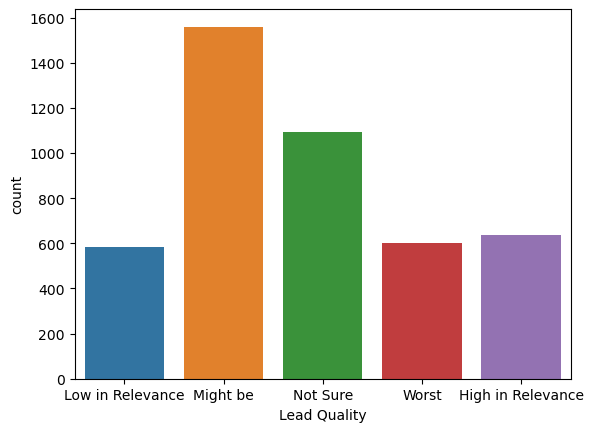

In [1582]:
print(leads['Lead Quality'].value_counts())
sns.countplot(data = leads , x = 'Lead Quality')
plt.show()

- Since the Lead Quality is an input based upon the understanding of the sales person. This columns contains 50% of missing values, if we impute them with 'not sure' It makes no sense afterwards. Hence, it's better to drop this column.

In [1583]:
leads.drop('Lead Quality', axis =1, inplace = True)
round(100*leads.isnull().sum()/leads.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

-Next we have the second highest null values in the following 4 columns:
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score

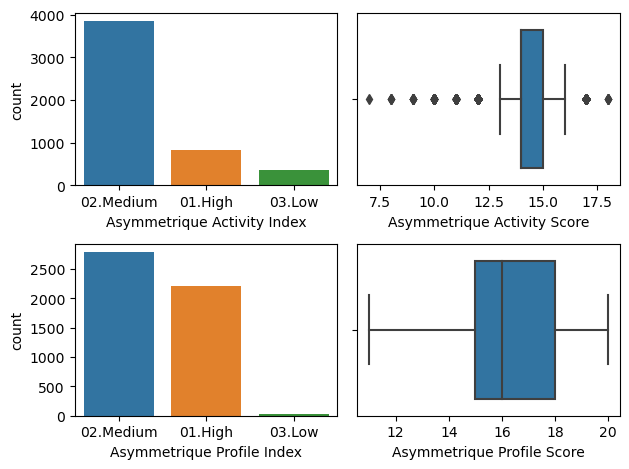

In [1584]:
# Create subplots
fig, axes = plt.subplots(2, 2)

# Plot countplot and boxplot on respective axes
sns.countplot(data=leads, x='Asymmetrique Activity Index', ax=axes[0, 0])
sns.boxplot(data=leads, x='Asymmetrique Activity Score', ax=axes[0, 1])
sns.countplot(data=leads, x='Asymmetrique Profile Index', ax=axes[1, 0])
sns.boxplot(data=leads, x='Asymmetrique Profile Score', ax=axes[1, 1])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

- There is a large spread in the data and hence it is difficult to fill the fields with any specific value.

In [1585]:
leads = leads.drop(['Asymmetrique Activity Index',
'Asymmetrique Profile Index',
'Asymmetrique Activity Score',
'Asymmetrique Profile Score'], axis = 1)
round(100*leads.isnull().sum()/leads.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [1586]:
#Handling missing values in CITY column:
leads.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64


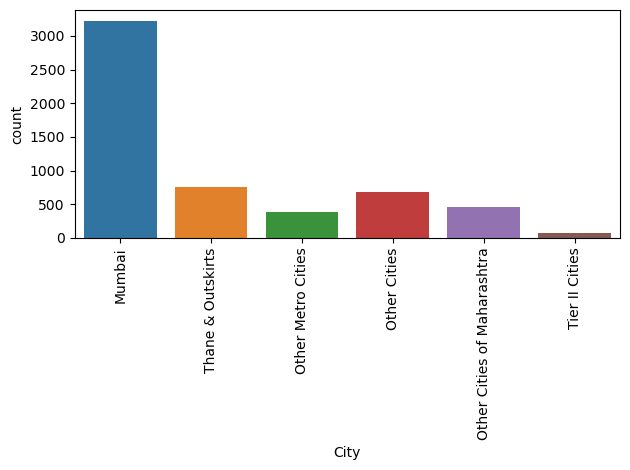

In [1587]:
print(leads.City.value_counts())
sns.countplot(data = leads, x = 'City')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [1588]:
#Since the user does not have provided the city so we can impute the 50% null values with other cities.
leads['City'] = leads['City'].replace(np.nan, 'Other Cities')
print(100*round(leads.isnull().sum()/leads.shape[0],2))

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [1589]:
#Handling missing values in Specialization column
leads.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

Specialization
Finance Management                   16.7
Human Resource Management            14.5
Marketing Management                 14.3
Operations Management                 8.6
Business Administration               6.9
IT Projects Management                6.2
Supply Chain Management               6.0
Banking, Investment And Insurance     5.8
Travel and Tourism                    3.5
Media and Advertising                 3.5
International Business                3.0
Healthcare Management                 2.7
Hospitality Management                1.9
E-COMMERCE                            1.9
Retail Management                     1.7
Rural and Agribusiness                1.2
E-Business                            1.0
Services Excellence                   0.7
Name: proportion, dtype: float64


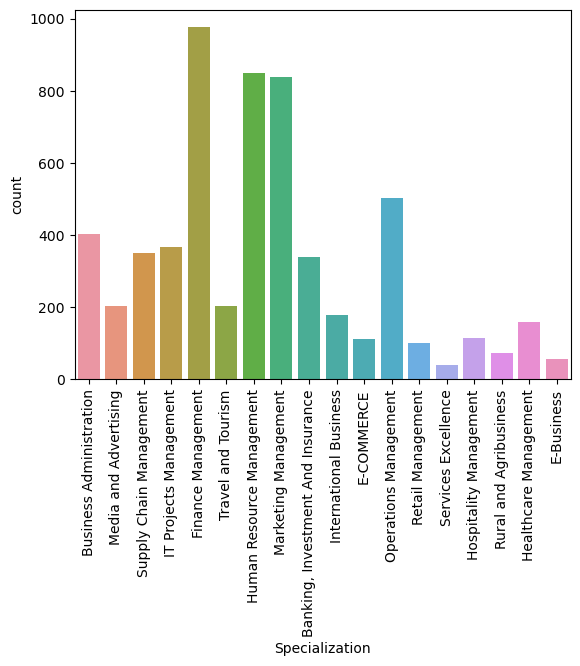

In [1590]:
print(round(100*leads.Specialization.value_counts(normalize = True),1))
sns.countplot(data =leads, x ='Specialization')
plt.xticks(rotation = 90)
plt.show()

In [1591]:
#Since 36% students does not have selected any Specialization, hence we can impute missing values with 'Other specialization' as 
#the students have left it blank. 
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Other Specialization')
print(100*round(leads.isnull().sum()/leads.shape[0],2))

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                    0.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [1592]:
#Handling missing values in Tags column
print(leads.Tags.value_counts())

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

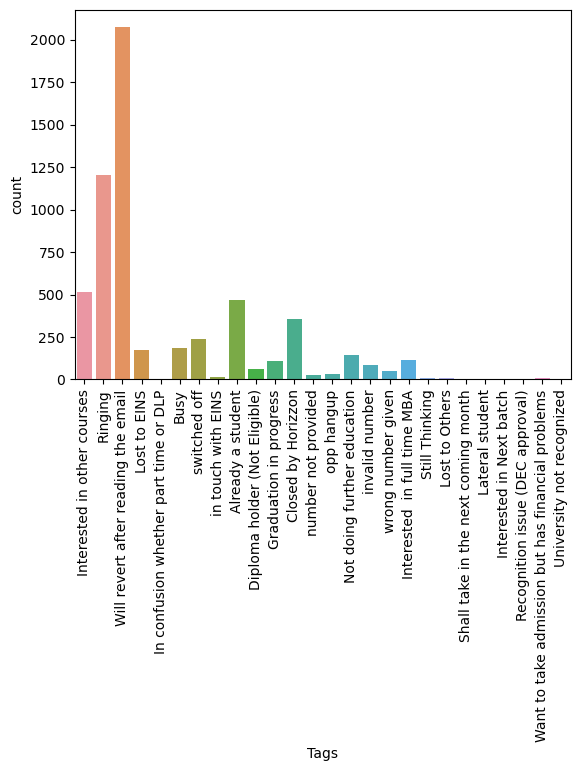

In [1593]:
sns.countplot(data = leads, x = 'Tags')
plt.xticks(rotation = 90)
plt.show()

In [1594]:
leads['Tags'] = leads['Tags'].replace(np.nan, 'Other Tags')
print(100*round(leads.isnull().sum()/leads.shape[0],2))

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                    0.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [1595]:
#Handling missing values in 'What matters most to you in choosing a course'
print(leads['What matters most to you in choosing a course'].value_counts())

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64


In [1596]:
leads['What matters most to you in choosing a course'].mode()

0    Better Career Prospects
Name: What matters most to you in choosing a course, dtype: object

In [1597]:
#We can replace the missing values with 'Better Career Prospects'
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, leads['What matters most to you in choosing a course'].mode()[0])
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64


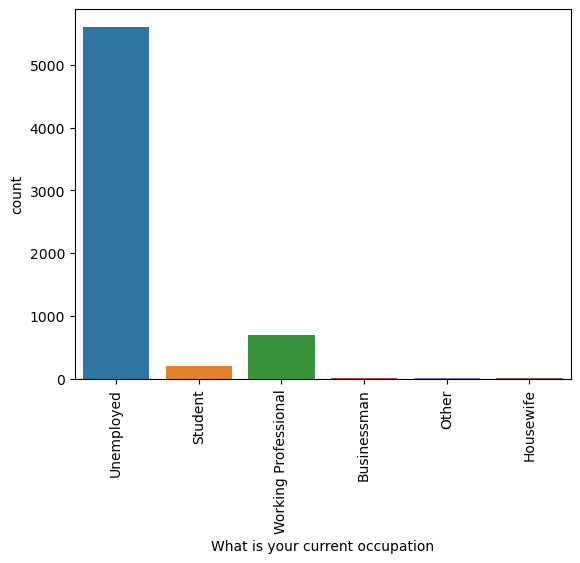

In [1598]:
#Handling missing values in 'What is your current occupation'
print(leads['What is your current occupation'].value_counts())
sns.countplot(data = leads , x = 'What is your current occupation')
plt.xticks(rotation = 90)
plt.show()

In [1599]:
# Maximum values are unemployed and it is evident that many people who are unemployed will leave the current occupation column blank
# Thus imputing the Null values in Current Occupation with Unemployed
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, leads['What is your current occupation'].mode()[0])
print(round(100*leads.isnull().sum()/leads.shape[0],2))

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

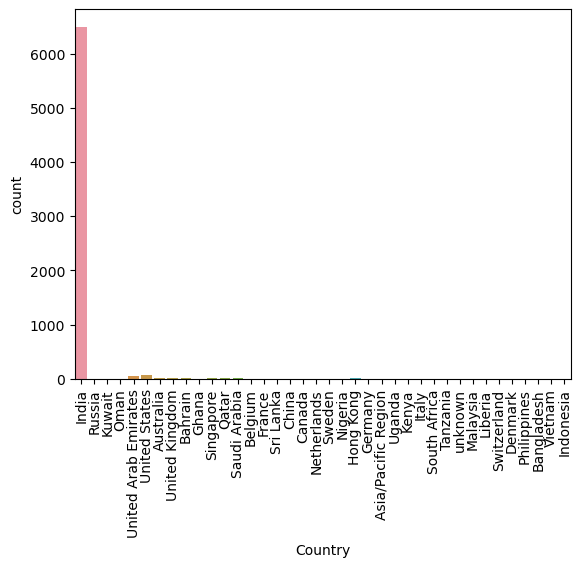

In [1600]:
#Handling missing values in 'Country'
print(leads.Country.value_counts())
sns.countplot(data = leads , x = 'Country')
plt.xticks(rotation = 90)
plt.show()

In [1601]:
#We can immute the null values with 'India'
leads['Country'] = leads['Country'].replace(np.nan, leads['Country'].mode()[0])
print(round(100*leads.isnull().sum()/leads.shape[0],2))

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [1602]:
#Rest all the columns have null values less than 2%, we can simply drop them

In [1603]:
leads = leads.dropna()
print(leads.isnull().sum())

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [1604]:
leads.shape

(9074, 30)

In [1605]:
(9074/9240)*100

98.2034632034632

- We are left with 98% of the rows

### Data below is cleaned

In [1606]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Other Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Other Cities,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Other Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Other Cities,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Other Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


#### Exploratory Analysis
- We have build our analysis around the convereted columns, that's our target variable.

1. Univariate Analysis

Converted
0    5639
1    3435
Name: count, dtype: int64


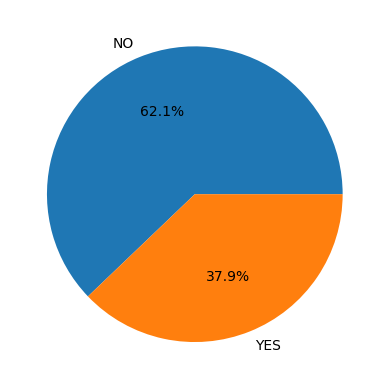

In [1607]:
print(leads.Converted.value_counts())
plt.pie(x = leads['Converted'].value_counts(), labels = ['NO', 'YES'], autopct='%1.1f%%')
plt.show()

- The data is not hugely imbalanced
- Percentage of conversion is 37.9%

#### Bi-variate Analysis
- To get the inferences against the target vairiable 'Converted'

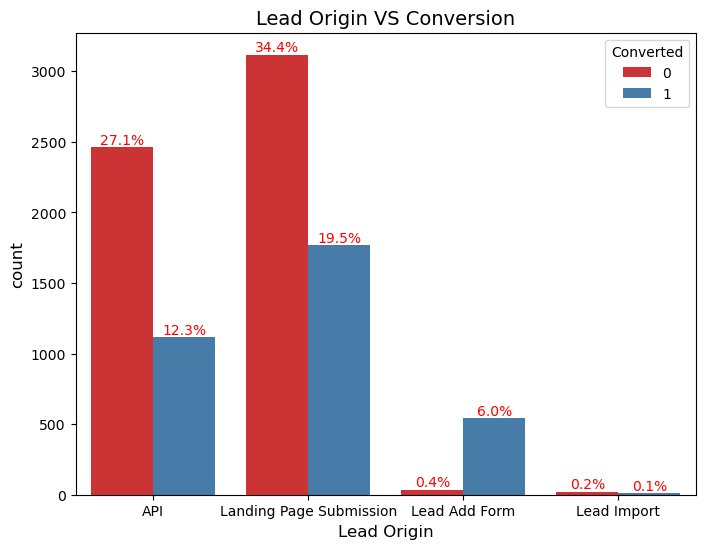

In [1608]:
#Lead Origin VS Conversion
plt.figure(figsize=[8,6])
plot = sns.countplot(data = leads,  x = 'Lead Origin', hue = 'Converted',palette='Set1')
plt.title('Lead Origin VS Conversion', fontsize=14)
plt.xlabel('Lead Origin', fontsize=12)
plt.ylabel('count', fontsize=12)

for p in plot.patches:
    plt.annotate('{:1.1f}%'.format((p.get_height() * 100 / len(leads))),
                 ((p.get_x() + p.get_width() / 2, p.get_height())),
                 color='red', ha='center', va='bottom')

- API and Landing Page Submission have 30-35% conversion rate but count of lead is also high.
- Lead Add Form has good a conversion rate but count of lead are not very high.
#### To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

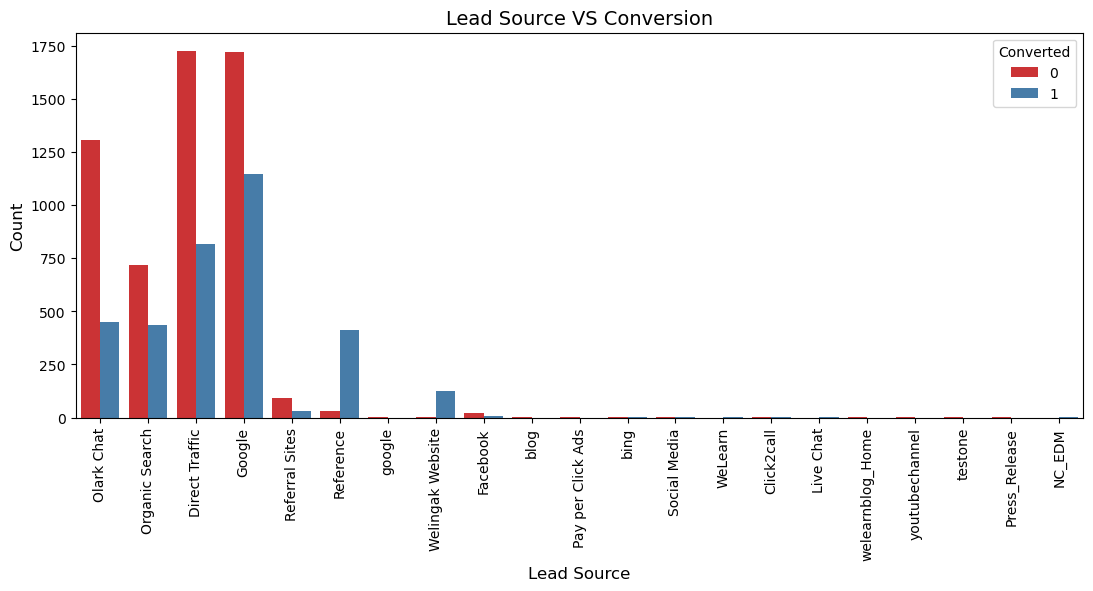

In [1609]:
#Lead Source VS Converstion
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads, palette='Set1')
plt.title('Lead Source VS Conversion', fontsize = 14)
plt.xlabel('Lead Source', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

- Need to replace 'google' with "Google".

In [1611]:
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

In [1612]:
#Let's put all the other sources that does not have much values in a new category 
leads['Lead Source'] = leads['Lead Source'].replace(['blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], 'Others')

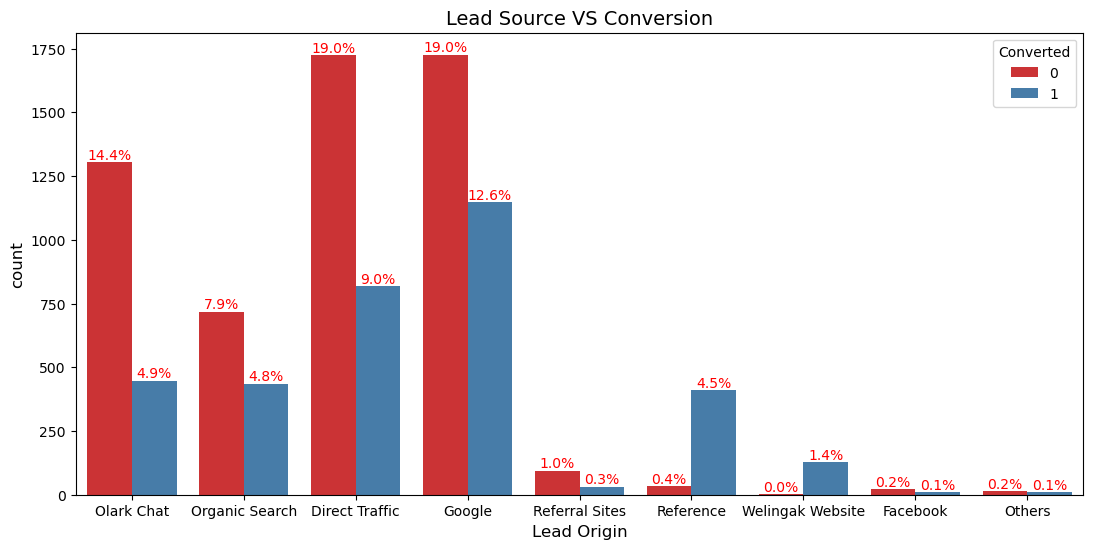

In [1613]:
plt.figure(figsize=[13,6])
plot = sns.countplot(data = leads,  x = 'Lead Source', hue = 'Converted',palette='Set1')
plt.title('Lead Source VS Conversion', fontsize=14)
plt.xlabel('Lead Origin', fontsize=12)
plt.ylabel('count', fontsize=12)

for p in plot.patches:
    plt.annotate('{:1.1f}%'.format((p.get_height() * 100 / len(leads))),
                 ((p.get_x() + p.get_width() / 2, p.get_height())),
                 color='red', ha='center', va='bottom')

- Google and Direct Traffic generates maximum numer of leads.
- Conversion rate of Refrence leads and leads through Welingak Website is high
#### To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

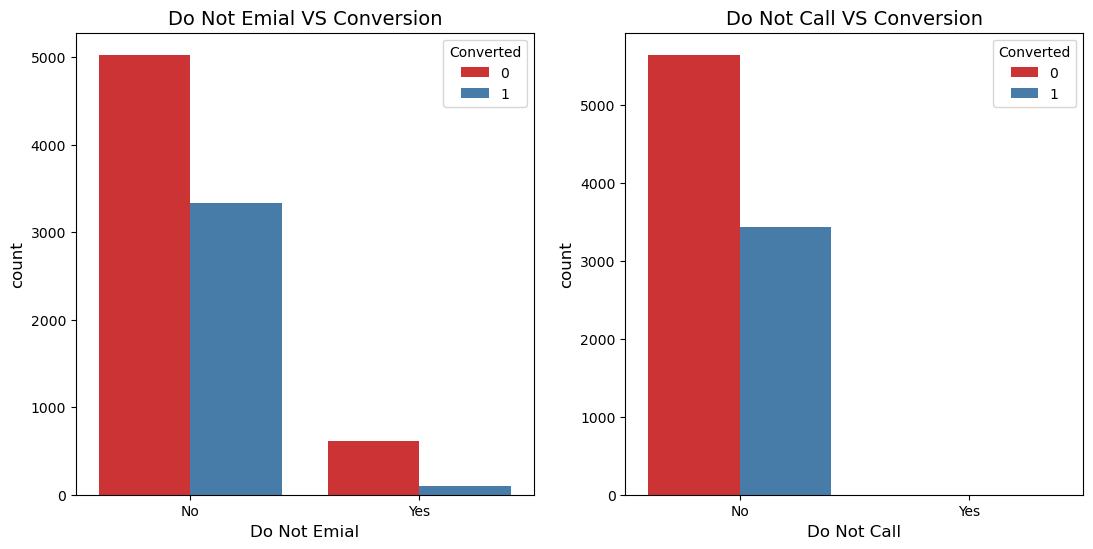

In [1614]:
#Do Not Emial VS Conversion
#Do Not Call VS Conversion
plt.figure(figsize=[13,6])
plt.subplot(1,2,1)
plot = sns.countplot(data = leads,  x = 'Do Not Email', hue = 'Converted',palette='Set1')

plt.title('Do Not Emial VS Conversion', fontsize=14)
plt.xlabel('Do Not Emial', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.subplot(1,2,2)
plot = sns.countplot(data = leads,  x = 'Do Not Call', hue = 'Converted',palette='Set1')

plt.title('Do Not Call VS Conversion', fontsize=14)
plt.xlabel('Do Not Call', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

- Nothing can be concluded on the basis of Do Not Email and Do Not Call.

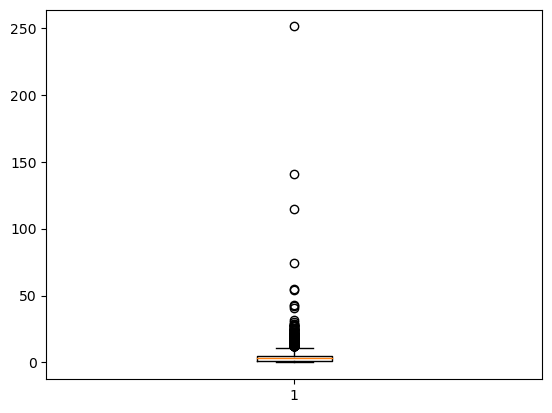

In [1615]:
plt.boxplot(data = leads, x = leads['TotalVisits'])
plt.show()

In [1616]:
leads.TotalVisits.describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

- As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [1617]:
perc = leads['TotalVisits'].quantile([0, 0.95]).values
leads['TotalVisits'][leads['TotalVisits'] >= perc[1]] = perc[1]

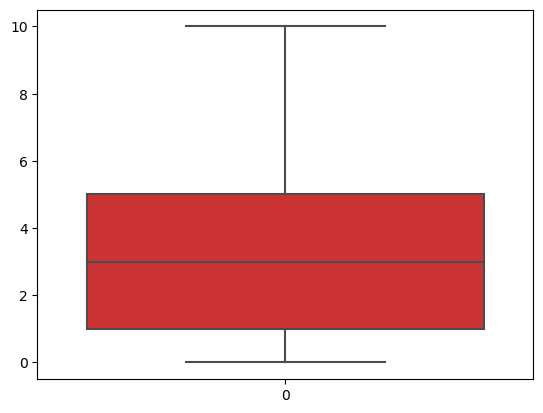

In [1618]:
#Visualizing again
sns.boxplot(leads['TotalVisits'],orient='vert',palette='Set1')
plt.show()

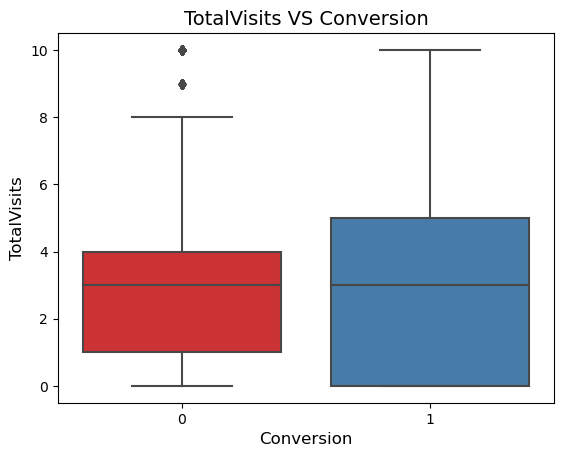

In [1619]:
#Total Visits VS Conversion
sns.boxplot(x = 'Converted', y = 'TotalVisits', data = leads, palette = 'Set1')
plt.title('TotalVisits VS Conversion', fontsize = 14)
plt.xlabel('Conversion', fontsize = 12)
plt.ylabel('TotalVisits', fontsize = 12)
plt.show()

- Median for converted and not converted leads are the same. They almost have similar visits
#### Nothing can be concluded on the basis of Total Visits.

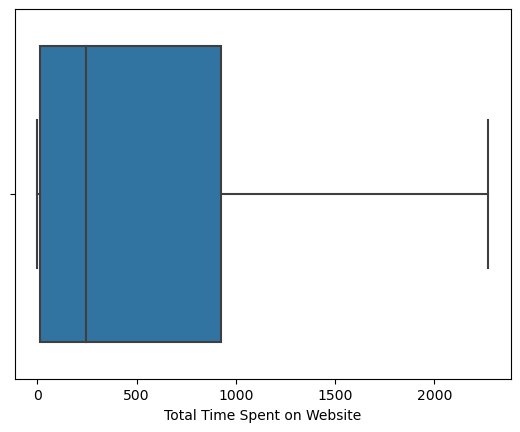

In [1620]:
#Total Time Spent on Websites
sns.boxplot(x = 'Total Time Spent on Website', data = leads)
plt.show()

- There are no outliers, let's check the spread for 'Converted' and 'Not Converted.

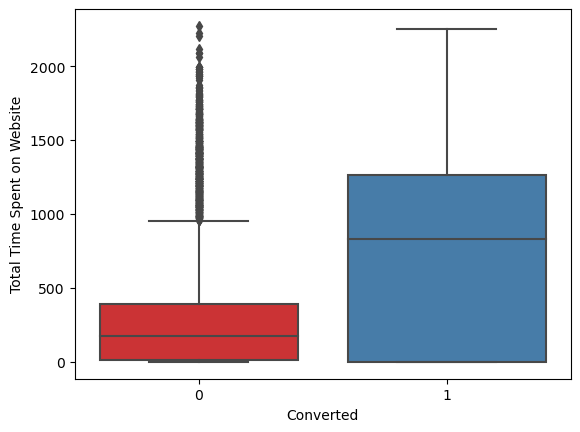

In [1621]:
#Total Time Spent on Website VS Conversion
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads, palette = 'Set1')
plt.show()

- Leads spending more time on the weblise are more likely to be converted.
#### Website should be made more engaging to make leads spend more time.

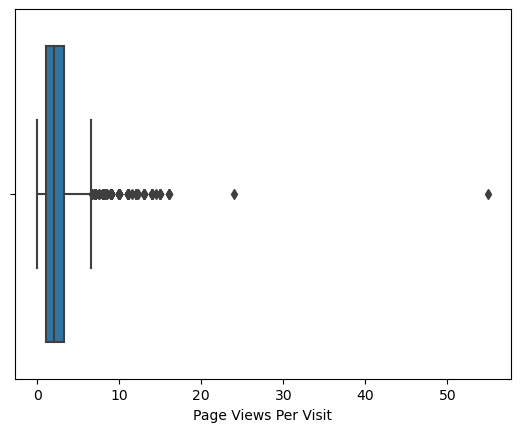

In [1622]:
#Page Views Per Visit
sns.boxplot(x = 'Page Views Per Visit', data = leads)
plt.show()

In [1623]:
leads['Page Views Per Visit'].describe(percentiles = [0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [1624]:
# Since there are many outliers, we can the outliers inside the 95th percentile
perc = leads['Page Views Per Visit'].quantile([0, 0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= perc[1]] = perc[1]

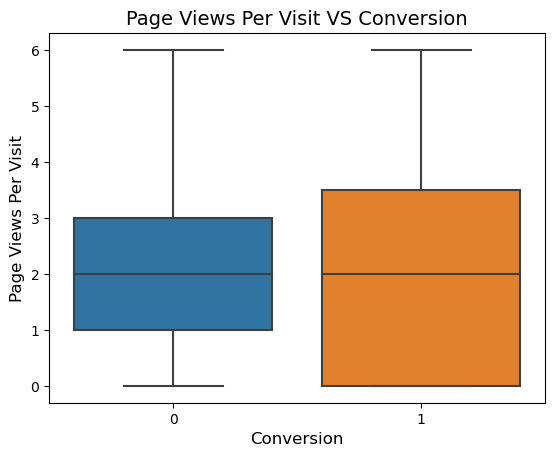

In [1625]:
#Page Views Per Visit VS Conversion
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.title('Page Views Per Visit VS Conversion', fontsize = 14)
plt.xlabel('Conversion', fontsize = 12)
plt.ylabel('Page Views Per Visit', fontsize = 12)
plt.show()

- Median for converted and unconverted leads is the same.
#### Nothing can be said specifically for lead conversion from Page Views Per Visit

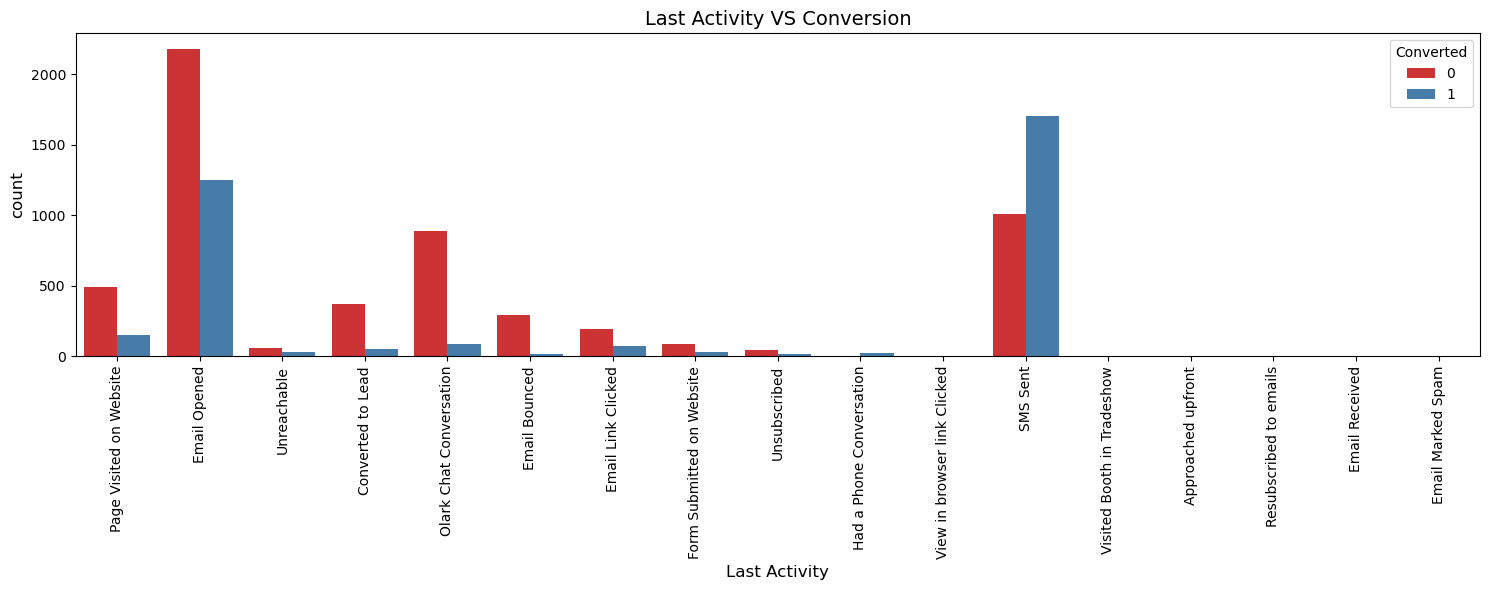

In [1626]:
plt.figure(figsize = [15,6])
plot = sns.countplot(data = leads,  x = 'Last Activity', hue = 'Converted',palette='Set1')
plt.title('Last Activity VS Conversion', fontsize=14)
plt.xlabel('Last Activity', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.xticks(rotation = 90)
plt.tight_layout()

In [1627]:
#Let's put all the other activities that does not have much values in a new category 
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                         'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'], 'Other activity')

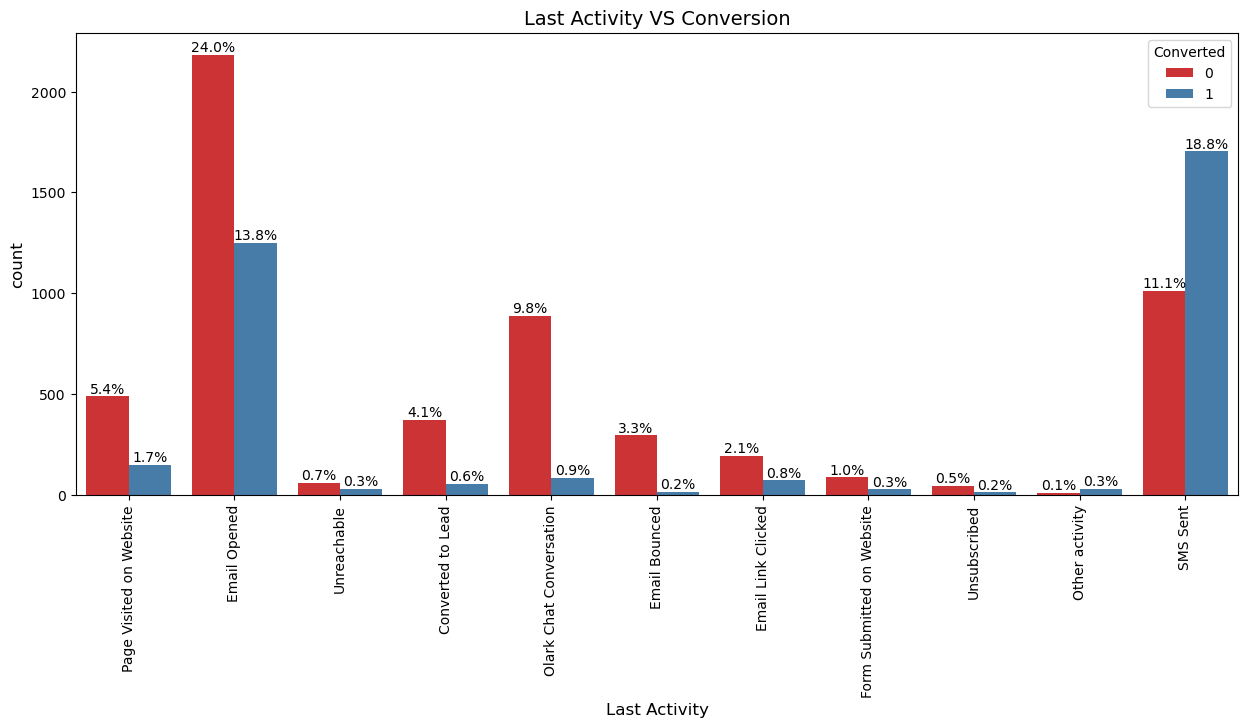

In [1628]:
plt.figure(figsize = [15,6])
plot = sns.countplot(data = leads,  x = 'Last Activity', hue = 'Converted',palette='Set1')
plt.title('Last Activity VS Conversion', fontsize=14)
plt.xlabel('Last Activity', fontsize=12)
plt.ylabel('count', fontsize=12)

for p in plot.patches:
    plt.annotate('{:1.1f}%'.format((p.get_height() * 100 / len(leads))),
                 ((p.get_x() + p.get_width() / 2, p.get_height())),
                 color='black', ha='center', va='bottom')
plt.xticks(rotation = 90)
plt.show()

- Most of the leads have Email opened as their last activity.
- Conversion rate for leads with last activity as SMS Sent is almost 60%
#### For better conversion the leads as SMS Sent should be increased.

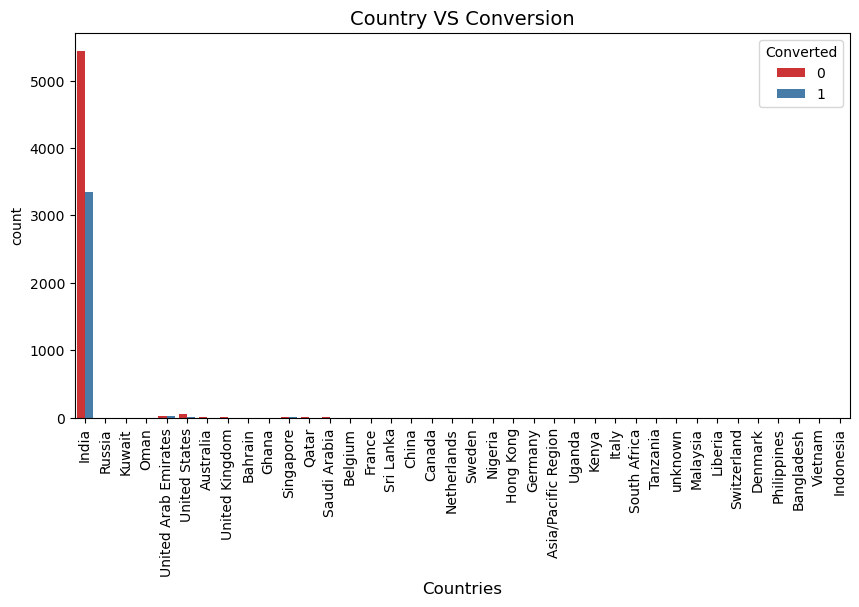

In [1629]:
#Country VS Converted
plt.figure(figsize = [10,5])
sns.countplot(data = leads,  x = 'Country', hue = 'Converted',palette='Set1')
plt.title('Country VS Conversion', fontsize = 14)
plt.xlabel('Countries', fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

- Most values are 'India' No such inferences can be drawn

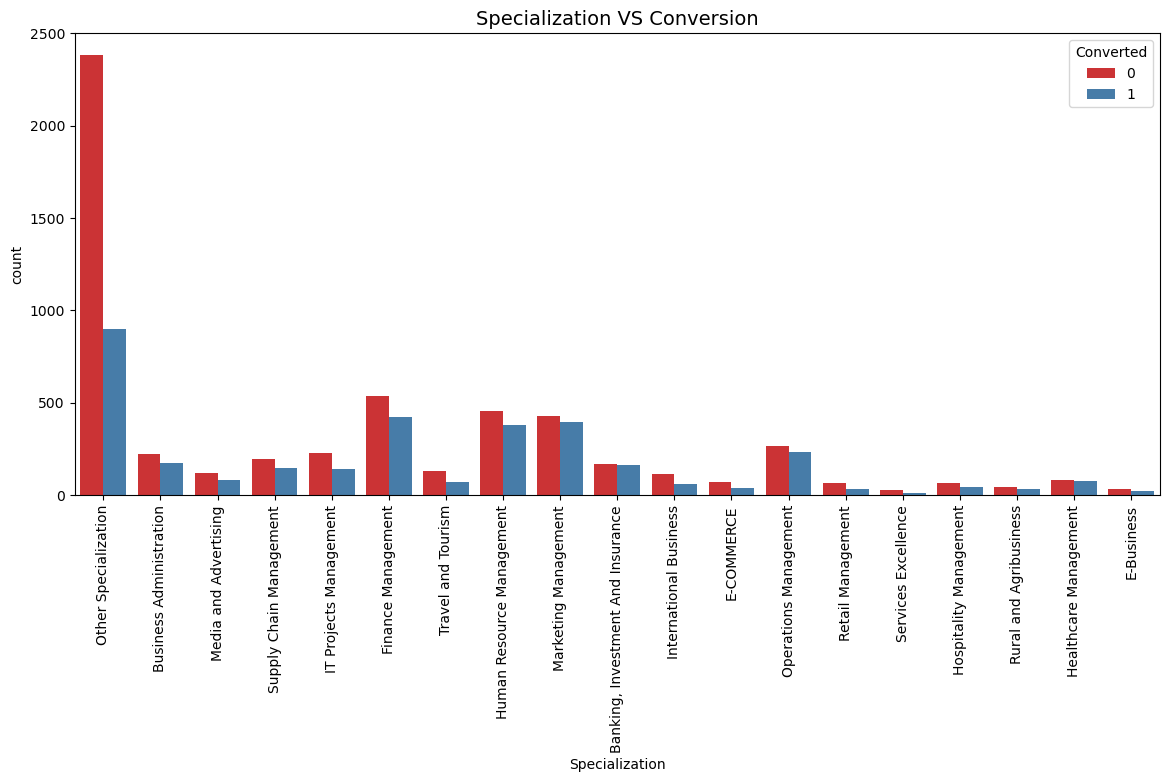

In [1630]:
#Specialization VS Converted
plt.figure(figsize =[14,6])
plot = sns.countplot(data = leads, x = 'Specialization', hue = 'Converted', palette = 'Set1')
plt.title('Specialization VS Conversion', fontsize = 14)
plt.xticks(rotation = 90)
 
plt.show()

- 36% of overall leads are generated with 'Other specialization','Finance management', 'Human Resource Management', 'Marketing management' has good conversion as per their leads.
#### For better perfromance the focus should be on the leads.

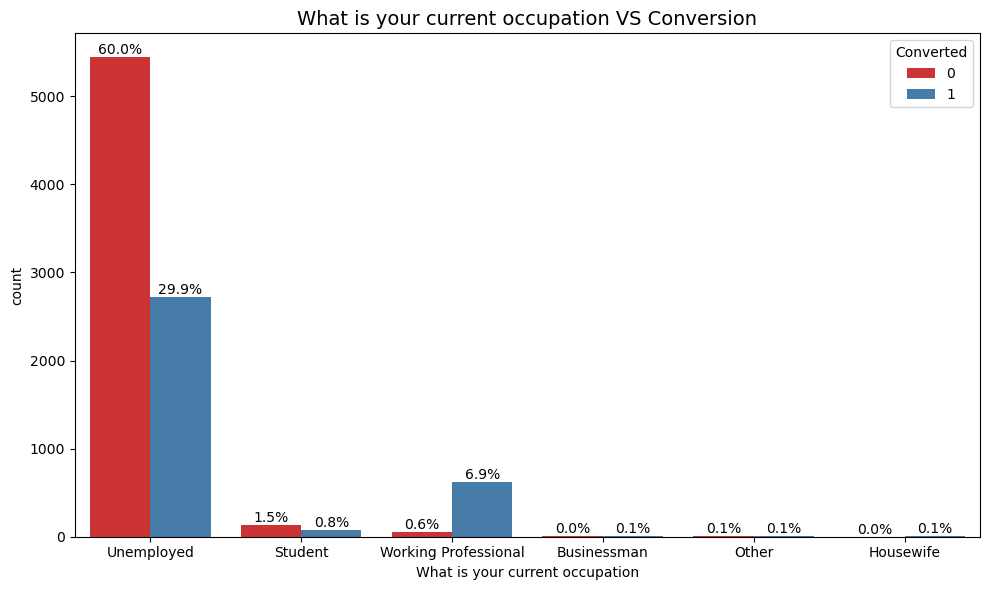

In [1631]:
#What is your current occupation VS Converted
plt.figure(figsize = [10,6])
plot = sns.countplot(data = leads,  x = 'What is your current occupation', hue = 'Converted', palette = 'Set1')
plt.title('What is your current occupation VS Conversion', fontsize = 14 )
for p in plot.patches:
    plt.annotate('{:1.1f}%'.format((p.get_height()*100/len(leads))), ((p.get_x() + p.get_width()/2, p.get_height())),
                 color = 'black', ha = 'center', va = 'bottom')
plt.tight_layout()

- Working professionals have higher chances of joining the course.
- Unemployed leads are the maximum and has approx 30% conversion rate.

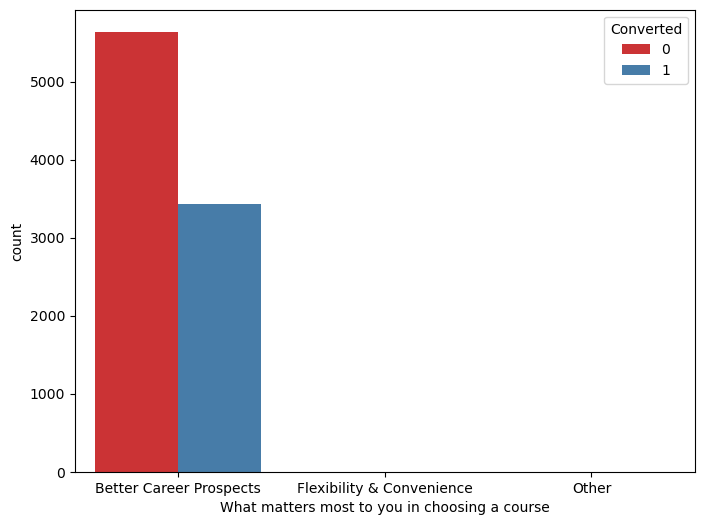

In [1632]:
#What matters most to you in choosing a course VS Converted

plt.figure(figsize= [8,6])
sns.countplot(data =leads, x ='What matters most to you in choosing a course', hue = 'Converted', palette = 'Set1')

plt.show()

- Since most of the responses belong to one category 'Better career prospects', hence we cannot draw any conclusion from this column. Thus dropping the column.

In [1633]:
leads.drop('What matters most to you in choosing a course',axis = 1, inplace = True )

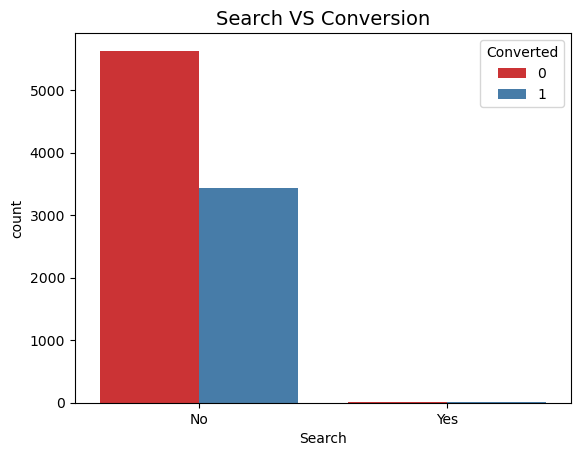

In [1634]:
#Search VS Converted
sns.countplot(data = leads, x = 'Search', hue = 'Converted', palette = 'Set1')
plt.title('Search VS Conversion', fontsize = 14)
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

Magazine
No    9074
Name: count, dtype: int64


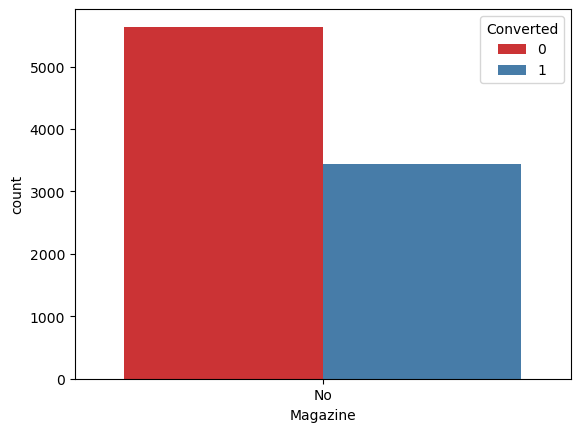

In [1635]:
# Magazine VS Converted
print(leads.Magazine.value_counts())
sns.countplot(data =  leads, x = 'Magazine', hue = 'Converted', palette = 'Set1')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

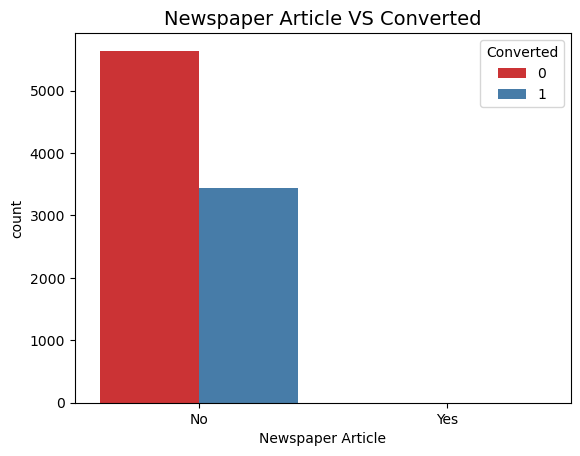

In [1636]:
# Newspaper Article VS Converted
sns.countplot(data = leads, x = 'Newspaper Article', hue = 'Converted', palette = 'Set1')
plt.title('Newspaper Article VS Converted', fontsize = 14)
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

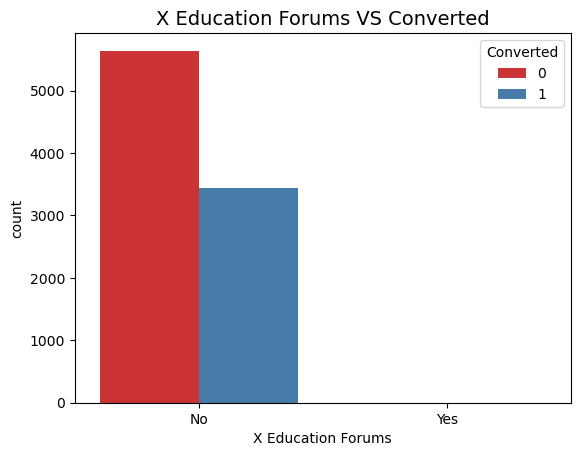

In [1637]:
# X Education Forums VS Converted
sns.countplot(data = leads , x = 'X Education Forums', hue = 'Converted', palette = 'Set1')
plt.title('X Education Forums VS Converted', fontsize = 14)
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

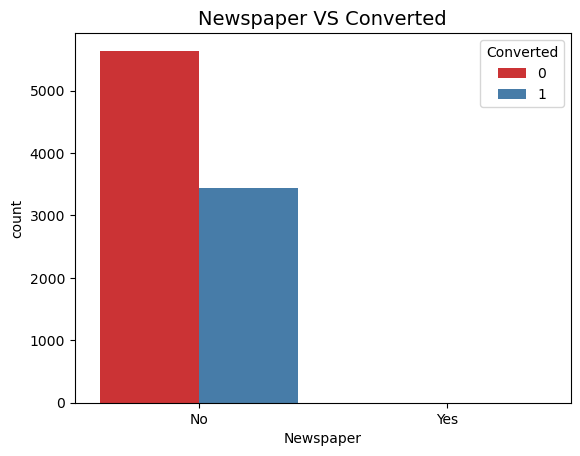

In [1638]:
#Newspaper VS Converted
sns.countplot(data = leads , x = 'Newspaper', hue = 'Converted', palette = 'Set1')
plt.title('Newspaper VS Converted', fontsize = 14)
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

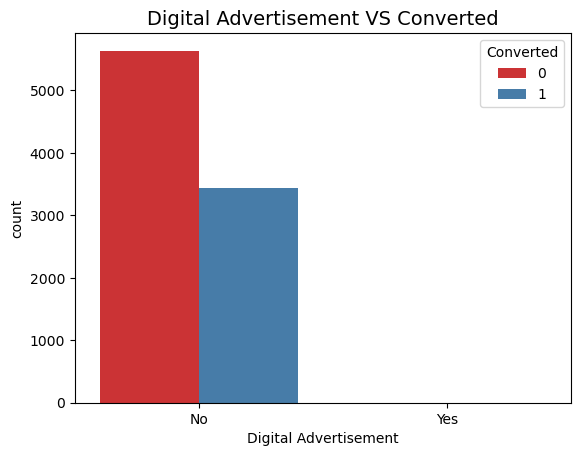

In [1639]:
#Digital Advertisement VS Converted
sns.countplot(data = leads, x = 'Digital Advertisement', hue = 'Converted', palette = 'Set1')
plt.title('Digital Advertisement VS Converted', fontsize = 14)
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

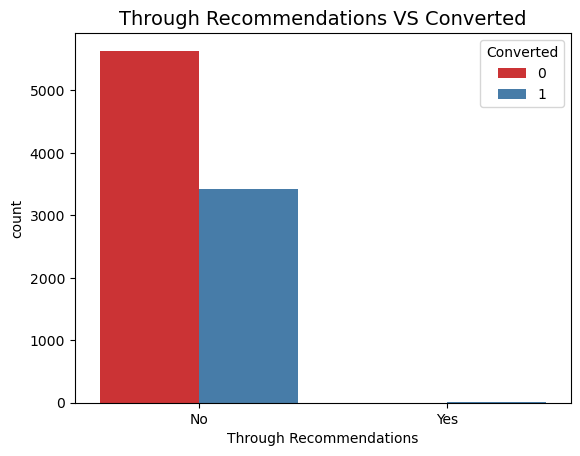

In [1640]:
# Through Recommendations VS Converted
sns.countplot(data = leads , x= 'Through Recommendations', hue = 'Converted', palette = 'Set1')
plt.title('Through Recommendations VS Converted', fontsize = 14)
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

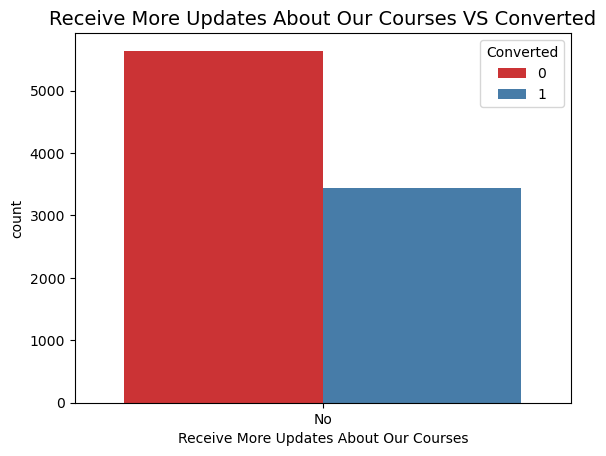

In [1641]:
# Receive More Updates About Our Courses VS Converted
sns.countplot(data = leads, x = 'Receive More Updates About Our Courses', hue = 'Converted', palette = 'Set1')
plt.title('Receive More Updates About Our Courses VS Converted', fontsize = 14)
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

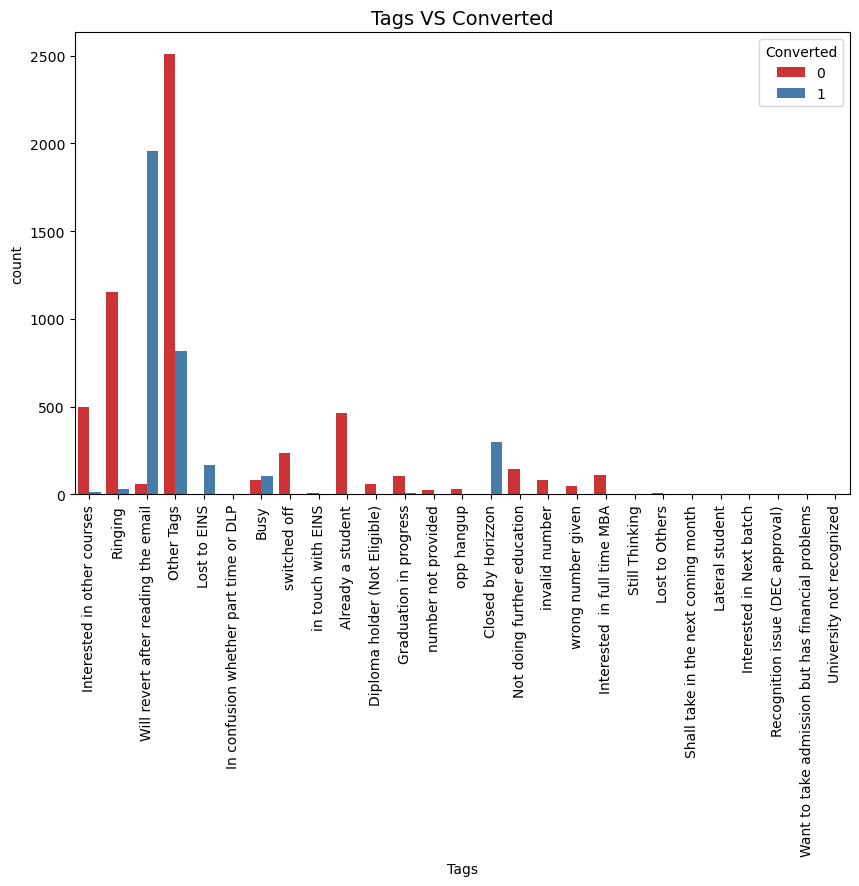

In [1642]:
plt.figure(figsize = [10, 6])
plot = sns.countplot(data = leads , x = 'Tags', hue = 'Converted', palette = 'Set1')
plt.title('Tags VS Converted', fontsize = 14)
plt.xticks(rotation = 90)

    
plt.show()

In [1643]:
leads['Tags'] = leads['Tags'].replace(['Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], 'Other Tags')

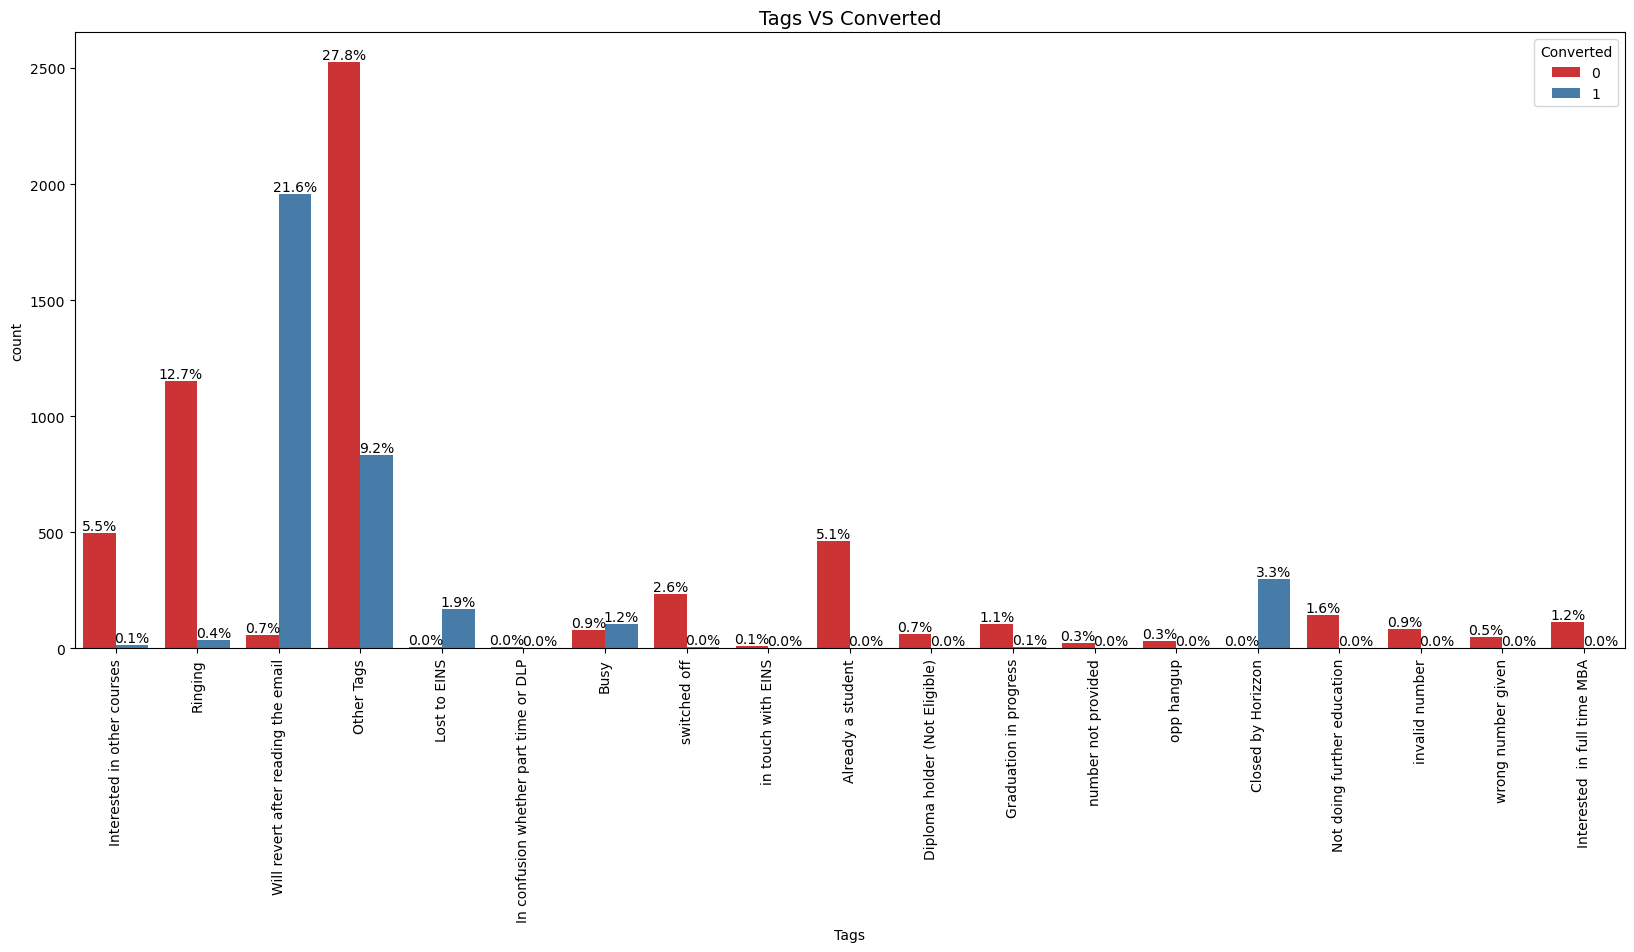

In [1644]:
plt.figure(figsize = [20, 8])
plot = sns.countplot(data = leads , x = 'Tags', hue = 'Converted', palette = 'Set1')
plt.title('Tags VS Converted', fontsize = 14)
plt.xticks(rotation = 90)


for p in plot.patches:
    plt.annotate('{:1.1f}%'.format((p.get_height()*100/ len(leads))),((p.get_x() + p.get_width()/2, p.get_height())),
                color = 'black', ha = 'center', va = 'bottom')
    
#plt.tight_layout()   
plt.show()

- More focus shall be given on the leads as 'will revert after reading the email', 'Closed by Horizzon' and others as these are potential leads and have higher rate of conversion.

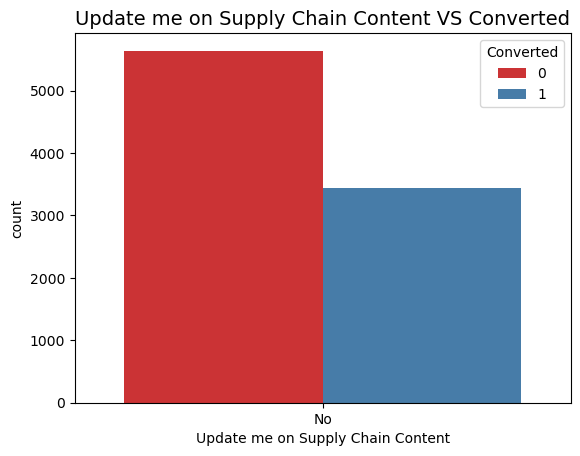

In [1645]:
# Update me on Supply Chain Content VS Converted 
sns.countplot(data = leads , x = 'Update me on Supply Chain Content', hue = 'Converted', palette = 'Set1')
plt.title('Update me on Supply Chain Content VS Converted', fontsize = 14)
plt.show()

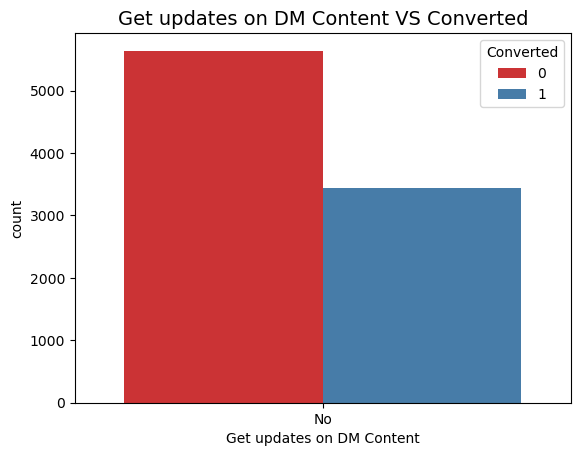

In [1646]:
# Get updates on DM Content VS Converted
sns.countplot(data = leads , x = 'Get updates on DM Content', hue = 'Converted', palette = 'Set1')
plt.title('Get updates on DM Content VS Converted', fontsize = 14)
plt.show()

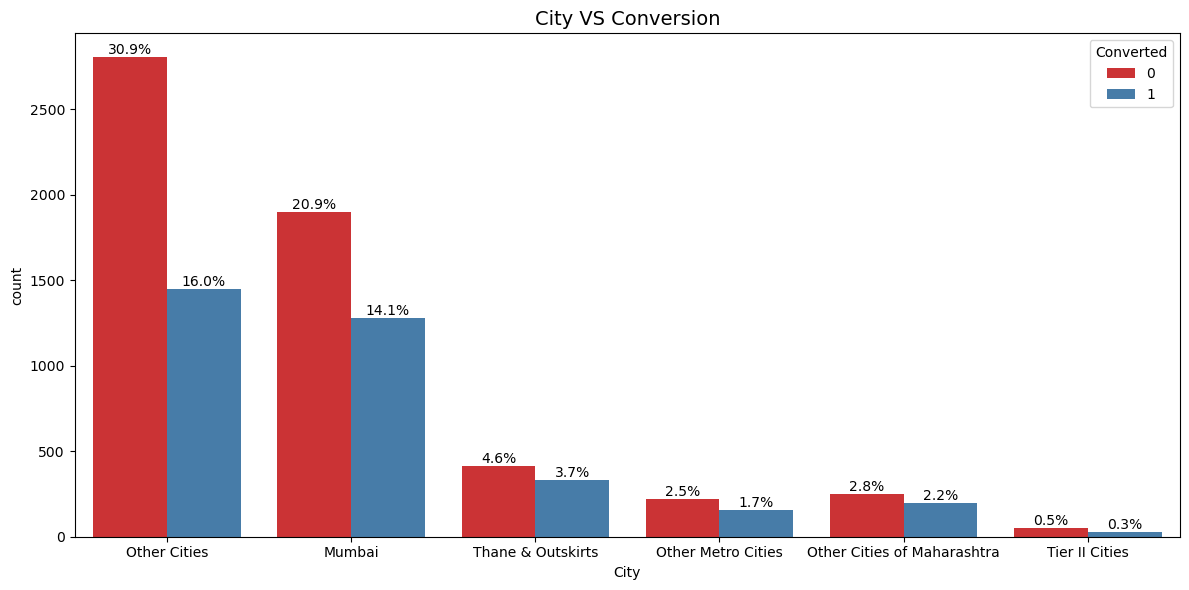

In [1647]:
# City VS Converted
plt.figure(figsize = [12, 6])
plot = sns.countplot(data = leads , x = 'City', hue = 'Converted', palette = 'Set1')
plt.title('City VS Conversion', fontsize = 14)

for p in plot.patches:
    plt.annotate('{:1.1f}%'.format((p.get_height()*100/ len(leads))),((p.get_x() + p.get_width()/2, p.get_height())),
                color = 'black', ha = 'center', va = 'bottom')

plt.tight_layout()
plt.show()

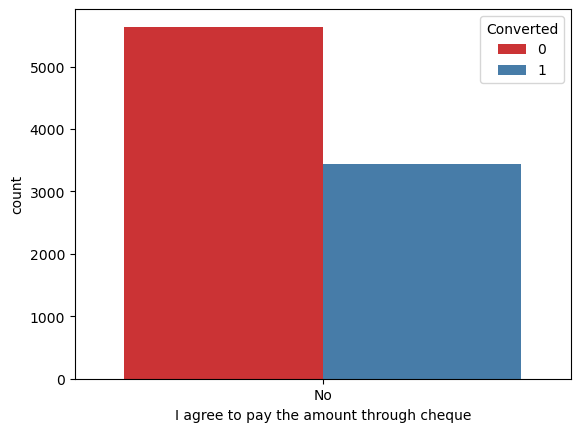

In [1648]:
#I agree to pay the amount through cheque Vs Converted

plot = sns.countplot(data = leads , x = 'I agree to pay the amount through cheque', hue = 'Converted', palette = 'Set1')
plt.show()

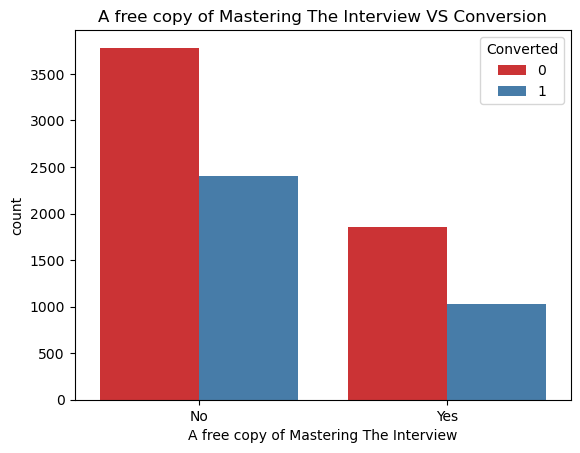

In [1649]:
# A free copy of Mastering The Interview VS Converted
plot = sns.countplot(data = leads , x = 'A free copy of Mastering The Interview', hue = 'Converted', palette = 'Set1')

plt.title('A free copy of Mastering The Interview VS Conversion', fontsize = 12)


plt.show()

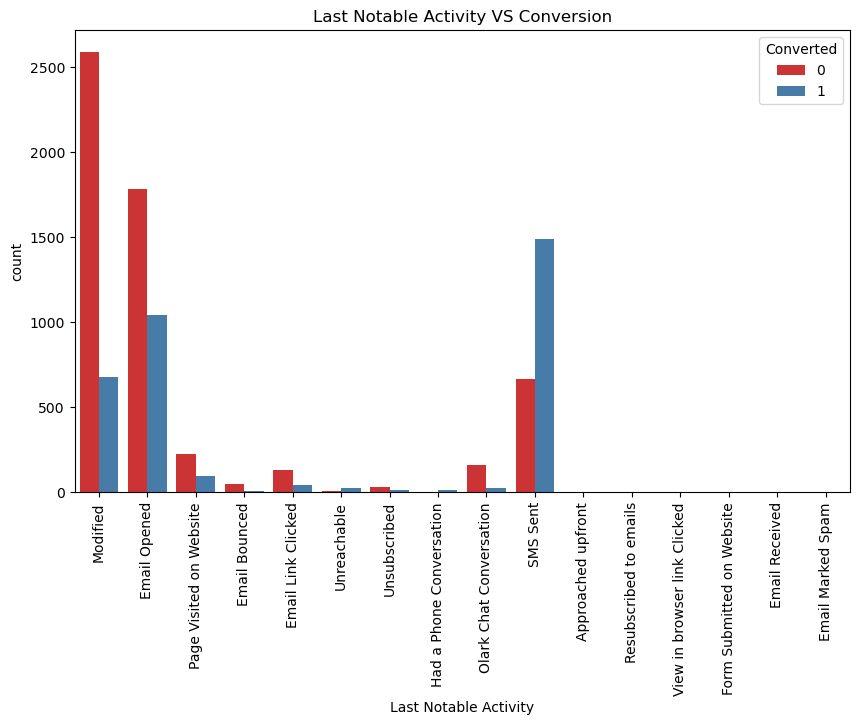

In [1650]:
# Last Notable Activity Vs Converted
plt.figure(figsize = [10,6])
plot = sns.countplot(data = leads , x = 'Last Notable Activity', hue = 'Converted', palette = 'Set1')

plt.title('Last Notable Activity VS Conversion', fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

- Lets create a separate category as 'Other Notable Activity' that contains values which have lesser data.

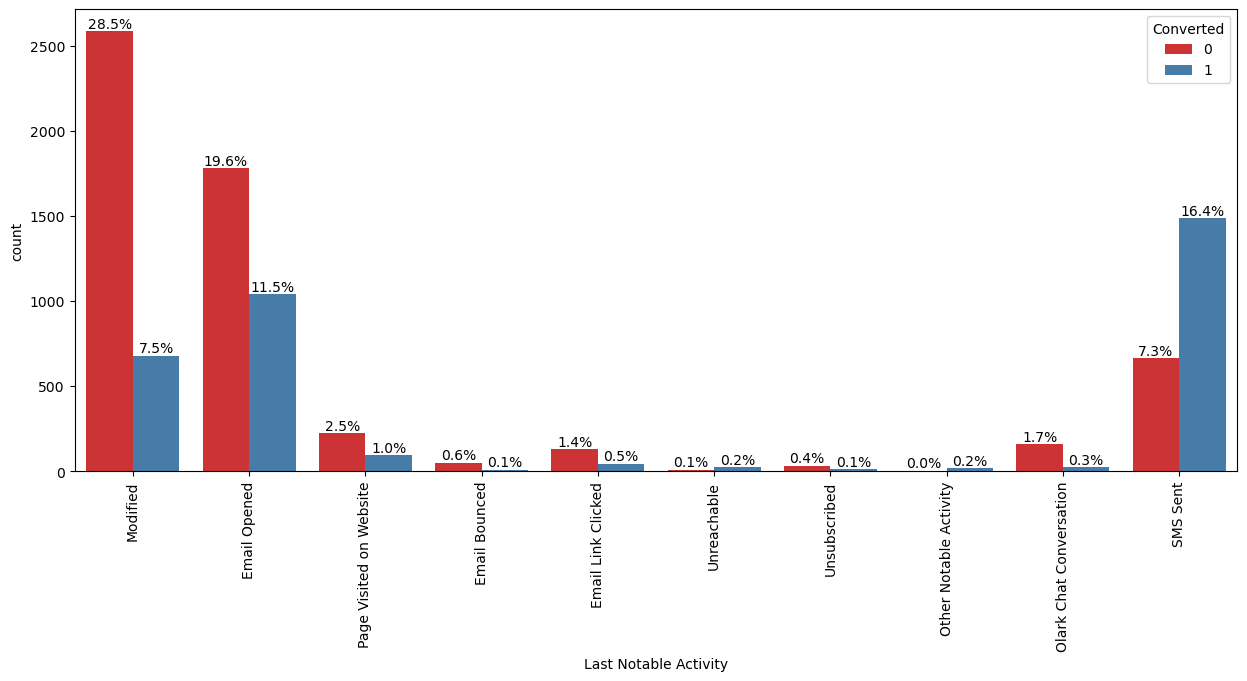

In [1651]:
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation','Approached upfront',
                                                                         'Form Submitted on Website','Resubscribed to emails',
                                                                         'View in browser link Clicked', 'Email Received', 
                                                                         'Email Marked Spam'],'Other Notable Activity')

#Last Notable Activity VS Conversion

plt.figure(figsize = [15,6])
plot = sns.countplot(x='Last Notable Activity', hue='Converted', data=leads, palette = 'Set1')

for p in plot.patches:
    plt.annotate('{:1.1f}%'.format((p.get_height()*100/ len(leads))),((p.get_x() + p.get_width()/2, p.get_height())),
                color = 'black', ha = 'center', va = 'bottom')
    
plt.xticks(rotation=90)
plt.show()

- SMS Sent as Last Notable Activity has high conversion rates
- Modified has the maximum leads and the conversion rate is low

#### Results


#### Based on the Exploratory Analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

- Prospect ID
- Countries
- Search
- Magazine
- Newspaper Article
- X Education Forum
- Newspaper
- Digital Advertisement
- Through Recommendation
- Recieve More Updates About Our Courses
- Update Me On Supply Chain Content
- Get Updates ON DM Content
- I Agree To Pay The Amount Through Cheque
- A Free Copy Of Mastering The Interview

In [1652]:
#Dropping insignificant columns:
leads = leads.drop(['Prospect ID','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                    'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview'], axis = 1)
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Other Cities,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Other Cities,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Mumbai,Modified


In [1653]:
leads.shape

(9074, 15)

In [1654]:
#Checking the remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      9074 non-null   int64  
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  Tags                     

### Data Preparation

In [1655]:
#Converting 'NO' and 'YES' t0 (0,1)
leads['Do Not Email'] = leads['Do Not Email'].map(lambda x : 1 if x == 'Yes' else 0 )
leads['Do Not Call'] = leads['Do Not Call'].map(lambda x : 1 if x == 'Yes' else 0)

In [1656]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Other Cities,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Other Cities,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Mumbai,Modified


In [1657]:
#Creating dummies
dummies = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity','Specialization','What is your current occupation',
                'Tags','City','Last Notable Activity']], drop_first = True)
dummies = dummies.astype(int)
#Adding dummies to dataset
leads = pd.concat([leads, dummies], axis = 1)

#Dropping columns 
leads.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization','What is your current occupation','Tags',
                'City','Last Notable Activity'], axis = 1, inplace = True)
leads.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [1658]:
leads.shape

(9074, 83)

### Splitting the data into train and test set

In [1659]:
#Separated the data into dependent and independent variable
X = leads.drop(['Lead Number', 'Converted'], axis = 1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [1660]:
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1661]:
#Importing library for train and test split
from sklearn.model_selection import train_test_split

In [1662]:
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.7 , random_state = 100)

In [1663]:
X_train.shape , X_test.shape

((6351, 81), (2723, 81))

### Feature Scalling

In [1664]:
from sklearn.preprocessing import StandardScaler

In [1665]:
scaler = StandardScaler()
cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [1666]:
Converted = leads.Converted.value_counts(normalize = True)*100
Converted

Converted
0    62.144589
1    37.855411
Name: proportion, dtype: float64

- We have almost 38% lead conversion rate

### Model Building

In [1667]:
import statsmodels.api as sm

In [1668]:
# Assuming X_train and y_train are my training data
X_train = sm.add_constant(X_train)
lg = sm.GLM(y_train, X_train , family = sm.families.Binomial()).fit()
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6269
Model Family:                Binomial   Df Model:                           81
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1092.1
Date:                Mon, 11 Mar 2024   Deviance:                       2184.1
Time:                        15:55:14   Pearson chi2:                 1.09e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6281
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0259      1.901     -0.540      0.589      -4.751       2.700
Do Not Email                                            -1.2713      0.358     -3.549      0.000      -1.973      -0.569
Do Not Call                                             21.3145   1.43e+05      0.000      1.000   -2.81e+05    2.81e+05
TotalVisits                                              0.3204      0.095      3.390      0.001       0.135       0.506
Total Time Spent on Website                              1.1851      0.069     17.227      0.000       1.050       1.320
Page Views Per Visit                                    -0.3929      0.108     -3.629      0.000      -0.605      -0.181
Lead Origin_Landing Page Submission                     -0.8090      0.255     -3.175      0.002      -1.308      -0.310
Lead Origin_Lead Add Form                               -1.2568      2.041     -0.616      0.538      -5.257       2.743
Lead Origin_Lead Import                                 27.3694   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -26.2390   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2688      0.170      1.577      0.115      -0.065       0.603
Lead Source_Olark Chat                                   1.1014      0.257      4.292      0.000       0.598       1.604
Lead Source_Organic Search                               0.0266      0.230      0.116      0.908      -0.425       0.478
Lead Source_Others                                       1.0407      0.915      1.138      0.255      -0.752       2.833
Lead Source_Reference                                    2.3755      2.088      1.137      0.255      -1.718       6.469
Lead Source_Referral Sites                               0.0734      0.533      0.138      0.890      -0.971       1.118
Lead Source_Welingak Website                             6.6460      2.173      3.059      0.002       2.388      10.904
Last Activity_Email Bounced                             -0.0356      0.923     -0.039      0.969      -1.845       1.773
Last Activity_Email Link Clicked                         1.2175      0.699      1.742      0.082      -0.153       2.587
Last Activity_Email Opened                               0.3991      0.445      0.897      0.370      -0.473       1.271
Last Activity_Form Submitted on Website                  0.2751      0.703      0.392      0.695      -1.102       1.652
Last Activity_Olark Chat Conversation                   -0.3046      0.451     -0.675      0.499      -1.189       0.579
Last Activity_Other activity                             2

In [1669]:
#Getting the predicted values on the Train Set
y_train_pred = lg.predict(X_train)
y_train_pred[:100]

3009    0.064798
1012    0.071644
9226    0.005271
4750    0.932971
7987    0.997882
          ...   
6016    0.223250
3335    0.015880
5926    0.105662
8631    0.980554
555     0.125200
Length: 100, dtype: float64

### Feature Selection Using RFE
- Since there are too many columns, we use RFE to choose the top 20 features for an understandable model.

In [1670]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [1671]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr, n_features_to_select = 20)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [1672]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('const', False, 63),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 49),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 8),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 60),
 ('Lead Source_Others', False, 21),
 ('Lead Source_Reference', False, 36),
 ('Lead Source_Referral Sites', False, 58),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 41),
 ('Last Activity_Email Link Clicked', False, 24),
 ('Last Activity_Email Opened', False, 39),
 ('Last Activity_Form Submitted on Website', False, 53),
 ('Last Activity_Olark Chat Conversation', False, 4),
 ('Last Activity_Other activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 59),
 ('Last A

In [1673]:
#Slected Columns
col = X_train.columns[rfe.support_]
print(col)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Other activity',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


In [1674]:
#Columns ignored 
X_train.columns[~rfe.support_]

Index(['const', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Internationa

In [1675]:
X_train[col]

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Other activity,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
3009,0,-0.160255,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1012,1,-0.540048,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9226,0,-0.888650,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4750,0,1.643304,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
7987,0,2.017593,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,0.595662,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
82,0,-0.888650,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8199,0,-0.888650,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
7077,0,-0.046500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Accesing the model with statsmodel

#### MODEL 1

In [1676]:
X_train_sm = sm.add_constant(X_train[col])
lg = sm.GLM(y_train, X_train_sm , family = sm.families.Binomial()).fit()
lg.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1149.8
Date:                Mon, 11 Mar 2024   Deviance:                       2299.6
Time:                        15:55:17   Pearson chi2:                 9.66e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6213
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.7165      0.222    -12.247      0.000      -3.151      -2.282
Do Not Email                                     -1.1296      0.278     -4.058      0.000      -1.675      -0.584
Total Time Spent on Website                       1.0200      0.058     17.545      0.000       0.906       1.134
Lead Origin_Landing Page Submission              -1.1951      0.125     -9.562      0.000      -1.440      -0.950
Lead Origin_Lead Add Form                         0.6163      0.442      1.395      0.163      -0.250       1.483
Lead Source_Welingak Website                      4.1748      0.853      4.893      0.000       2.502       5.847
Last Activity_Other activity                      1.6109      1.005      1.602      0.109      -0.359       3.581
Last Activity_SMS Sent                            1.3523      0.237      5.699      0.000       0.887       1.817
Tags_Busy                                         2.4280      0.321      7.560      0.000       1.799       3.057
Tags_Closed by Horizzon                           8.7313      0.765     11.419      0.000       7.233      10.230
Tags_Lost to EINS                                 8.1218      0.760     10.689      0.000       6.633       9.611
Tags_Other Tags                                   1.9261      0.221      8.705      0.000       1.492       2.360
Tags_Ringing                                     -1.8736      0.334     -5.605      0.000      -2.529      -1.218
Tags_Will revert after reading the email          6.7901      0.287     23.624      0.000       6.227       7.353
Tags_invalid number                             -22.7357   2.48e+04     -0.001      0.999   -4.86e+04    4.86e+04
Tags_number not provided                        -23.3268   4.13e+04     -0.001      1.000   -8.09e+04    8.09e+04
Tags_switched off                                -1.7744      0.583     -3.042      0.002      -2.918      -0.631
Tags_wrong number given                         -23.2580   3.26e+04     -0.001      0.999   -6.39e+04    6.38e+04
Last Notable Activity_Modified                   -1.4756      0.158     -9.325      0.000      -1.786      -1.165
Last Notable Activity_Olark Chat Conversation    -1.4654      0.423     -3.464      0.001      -2.294      -0.636
Last Notable Activity_SMS Sent                    1.0658      0.274      3.884      0.000       0.528       1.604
=================================================================================================================
"""

- Since the P-value of 'Tags_wrong number given' is very high. We can drop this column.

In [1677]:
col = col.drop('Tags_wrong number given',1)

#### MODEL 2

In [1678]:
X_train_sm = sm.add_constant(X_train[col])
lg = sm.GLM(y_train, X_train_sm , family = sm.families.Binomial()).fit()
lg.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1153.0
Date:                Mon, 11 Mar 2024   Deviance:                       2306.1
Time:                        15:55:17   Pearson chi2:                 9.63e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6209
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.8276      0.223    -12.693      0.000      -3.264      -2.391
Do Not Email                                     -1.1330      0.277     -4.087      0.000      -1.676      -0.590
Total Time Spent on Website                       1.0177      0.058     17.533      0.000       0.904       1.131
Lead Origin_Landing Page Submission              -1.2023      0.125     -9.632      0.000      -1.447      -0.958
Lead Origin_Lead Add Form                         0.6162      0.442      1.394      0.163      -0.250       1.483
Lead Source_Welingak Website                      4.1676      0.853      4.885      0.000       2.495       5.840
Last Activity_Other activity                      1.6143      1.006      1.605      0.108      -0.357       3.585
Last Activity_SMS Sent                            1.3474      0.237      5.674      0.000       0.882       1.813
Tags_Busy                                         2.5577      0.320      8.003      0.000       1.931       3.184
Tags_Closed by Horizzon                           8.8405      0.765     11.556      0.000       7.341      10.340
Tags_Lost to EINS                                 8.2334      0.760     10.831      0.000       6.744       9.723
Tags_Other Tags                                   2.0451      0.221      9.245      0.000       1.612       2.479
Tags_Ringing                                     -1.7361      0.332     -5.231      0.000      -2.387      -1.086
Tags_Will revert after reading the email          6.9049      0.288     23.975      0.000       6.340       7.469
Tags_invalid number                             -21.6007   1.51e+04     -0.001      0.999   -2.95e+04    2.95e+04
Tags_number not provided                        -22.1861   2.51e+04     -0.001      0.999   -4.91e+04    4.91e+04
Tags_switched off                                -1.6362      0.582     -2.812      0.005      -2.777      -0.496
Last Notable Activity_Modified                   -1.4687      0.158     -9.276      0.000      -1.779      -1.158
Last Notable Activity_Olark Chat Conversation    -1.4690      0.423     -3.474      0.001      -2.298      -0.640
Last Notable Activity_SMS Sent                    1.0461      0.274      3.818      0.000       0.509       1.583
=================================================================================================================
"""

- Since the P-value of 'Tags_number not provided' is very high. We can drop this column.

In [1679]:
col = col.drop('Tags_number not provided',1)
print(col)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Other activity',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


#### MODEL 3

In [1680]:
X_train_sm = sm.add_constant(X_train[col])
lg = sm.GLM(y_train, X_train_sm , family = sm.families.Binomial()).fit()
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1154.7
Date:                Mon, 11 Mar 2024   Deviance:                       2309.5
Time:                        15:55:18   Pearson chi2:                 9.63e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6207
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.8783      0.224    -12.866      0.000      -3.317      -2.440
Do Not Email                                     -1.1371      0.277     -4.112      0.000      -1.679      -0.595
Total Time Spent on Website                       1.0159      0.058     17.521      0.000       0.902       1.130
Lead Origin_Landing Page Submission              -1.2086      0.125     -9.682      0.000      -1.453      -0.964
Lead Origin_Lead Add Form                         0.6134      0.442      1.388      0.165      -0.253       1.480
Lead Source_Welingak Website                      4.1652      0.853      4.882      0.000       2.493       5.837
Last Activity_Other activity                      1.6218      1.008      1.609      0.108      -0.353       3.597
Last Activity_SMS Sent                            1.3475      0.238      5.673      0.000       0.882       1.813
Tags_Busy                                         2.6203      0.319      8.212      0.000       1.995       3.246
Tags_Closed by Horizzon                           8.8940      0.765     11.623      0.000       7.394      10.394
Tags_Lost to EINS                                 8.2879      0.760     10.900      0.000       6.798       9.778
Tags_Other Tags                                   2.1014      0.222      9.484      0.000       1.667       2.536
Tags_Ringing                                     -1.6697      0.331     -5.042      0.000      -2.319      -1.021
Tags_Will revert after reading the email          6.9605      0.288     24.135      0.000       6.395       7.526
Tags_invalid number                             -21.5356   1.51e+04     -0.001      0.999   -2.96e+04    2.95e+04
Tags_switched off                                -1.5699      0.581     -2.700      0.007      -2.710      -0.430
Last Notable Activity_Modified                   -1.4673      0.158     -9.265      0.000      -1.778      -1.157
Last Notable Activity_Olark Chat Conversation    -1.4721      0.423     -3.482      0.000      -2.301      -0.644
Last Notable Activity_SMS Sent                    1.0332      0.274      3.773      0.000       0.497       1.570
=================================================================================================================
"""

- Since the P-value of 'Tags_invalid number' is very high. We can drop this column.

In [1681]:
 col = col.drop('Tags_invalid number', 1)

#### MODEL 4

In [1682]:
X_train_sm = sm.add_constant(X_train[col])
lg = sm.GLM(y_train, X_train_sm , family = sm.families.Binomial()).fit()
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1157.8
Date:                Mon, 11 Mar 2024   Deviance:                       2315.5
Time:                        15:55:18   Pearson chi2:                 9.66e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6203
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.9913      0.223    -13.393      0.000      -3.429      -2.554
Do Not Email                                     -1.1360      0.276     -4.117      0.000      -1.677      -0.595
Total Time Spent on Website                       1.0226      0.058     17.642      0.000       0.909       1.136
Lead Origin_Landing Page Submission              -1.2183      0.125     -9.767      0.000      -1.463      -0.974
Lead Origin_Lead Add Form                         0.6199      0.442      1.401      0.161      -0.247       1.487
Lead Source_Welingak Website                      4.1581      0.853      4.874      0.000       2.486       5.830
Last Activity_Other activity                      1.6379      1.013      1.617      0.106      -0.347       3.623
Last Activity_SMS Sent                            1.3426      0.238      5.642      0.000       0.876       1.809
Tags_Busy                                         2.7526      0.316      8.699      0.000       2.132       3.373
Tags_Closed by Horizzon                           9.0097      0.765     11.775      0.000       7.510      10.509
Tags_Lost to EINS                                 8.4058      0.760     11.056      0.000       6.916       9.896
Tags_Other Tags                                   2.2235      0.220     10.112      0.000       1.793       2.655
Tags_Ringing                                     -1.5350      0.328     -4.677      0.000      -2.178      -0.892
Tags_Will revert after reading the email          7.0810      0.288     24.616      0.000       6.517       7.645
Tags_switched off                                -1.4320      0.580     -2.470      0.014      -2.568      -0.296
Last Notable Activity_Modified                   -1.4638      0.159     -9.229      0.000      -1.775      -1.153
Last Notable Activity_Olark Chat Conversation    -1.4821      0.423     -3.501      0.000      -2.312      -0.652
Last Notable Activity_SMS Sent                    1.0126      0.274      3.698      0.000       0.476       1.549
=================================================================================================================
"""

- Since the P-value of 'Last Activity_Other activity' is greater than threshold. We can drop this column.

In [1683]:
col = col.drop('Last Activity_Other activity', 1)

#### MODEL 5

In [1684]:
X_train_sm = sm.add_constant(X_train[col])
lg = sm.GLM(y_train, X_train_sm , family = sm.families.Binomial()).fit()
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1158.9
Date:                Mon, 11 Mar 2024   Deviance:                       2317.8
Time:                        15:55:18   Pearson chi2:                 9.64e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6202
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.9866      0.223    -13.367      0.000      -3.424      -2.549
Do Not Email                                     -1.1353      0.275     -4.126      0.000      -1.675      -0.596
Total Time Spent on Website                       1.0216      0.058     17.639      0.000       0.908       1.135
Lead Origin_Landing Page Submission              -1.2138      0.125     -9.739      0.000      -1.458      -0.970
Lead Origin_Lead Add Form                         0.6219      0.442      1.407      0.159      -0.244       1.488
Lead Source_Welingak Website                      4.1542      0.853      4.872      0.000       2.483       5.826
Last Activity_SMS Sent                            1.3322      0.238      5.601      0.000       0.866       1.798
Tags_Busy                                         2.7471      0.316      8.686      0.000       2.127       3.367
Tags_Closed by Horizzon                           9.0293      0.764     11.816      0.000       7.532      10.527
Tags_Lost to EINS                                 8.3991      0.760     11.052      0.000       6.910       9.889
Tags_Other Tags                                   2.2208      0.220     10.098      0.000       1.790       2.652
Tags_Ringing                                     -1.5371      0.328     -4.684      0.000      -2.180      -0.894
Tags_Will revert after reading the email          7.0868      0.287     24.661      0.000       6.524       7.650
Tags_switched off                                -1.4343      0.580     -2.475      0.013      -2.570      -0.298
Last Notable Activity_Modified                   -1.4583      0.158     -9.202      0.000      -1.769      -1.148
Last Notable Activity_Olark Chat Conversation    -1.4844      0.423     -3.506      0.000      -2.314      -0.655
Last Notable Activity_SMS Sent                    1.0182      0.274      3.719      0.000       0.482       1.555
=================================================================================================================
"""

- Since the P-value of 'Lead Origin_Lead Add Form' is greater than threshold. We can drop this column. The column seems to be insignificant

In [1685]:
col = col.drop('Lead Origin_Lead Add Form', 1)

#### MODEL 6

In [1686]:
X_train_sm = sm.add_constant(X_train[col])
lg = sm.GLM(y_train, X_train_sm , family = sm.families.Binomial()).fit()
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1160.0
Date:                Mon, 11 Mar 2024   Deviance:                       2319.9
Time:                        15:55:18   Pearson chi2:                 9.67e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6201
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.9678      0.223    -13.312      0.000      -3.405      -2.531
Do Not Email                                     -1.1179      0.274     -4.081      0.000      -1.655      -0.581
Total Time Spent on Website                       1.0162      0.058     17.549      0.000       0.903       1.130
Lead Origin_Landing Page Submission              -1.2430      0.123    -10.090      0.000      -1.484      -1.002
Lead Source_Welingak Website                      4.7492      0.740      6.419      0.000       3.299       6.199
Last Activity_SMS Sent                            1.3624      0.236      5.761      0.000       0.899       1.826
Tags_Busy                                         2.7479      0.316      8.684      0.000       2.128       3.368
Tags_Closed by Horizzon                           9.2506      0.752     12.297      0.000       7.776      10.725
Tags_Lost to EINS                                 8.4420      0.759     11.120      0.000       6.954       9.930
Tags_Other Tags                                   2.2184      0.220     10.084      0.000       1.787       2.650
Tags_Ringing                                     -1.5188      0.328     -4.631      0.000      -2.162      -0.876
Tags_Will revert after reading the email          7.1531      0.284     25.143      0.000       6.595       7.711
Tags_switched off                                -1.4449      0.580     -2.492      0.013      -2.582      -0.308
Last Notable Activity_Modified                   -1.4760      0.158     -9.315      0.000      -1.787      -1.165
Last Notable Activity_Olark Chat Conversation    -1.5004      0.423     -3.545      0.000      -2.330      -0.671
Last Notable Activity_SMS Sent                    0.9968      0.273      3.653      0.000       0.462       1.532
=================================================================================================================
"""

In [1687]:
# Initialize a DataFrame to store VIF values
vif = pd.DataFrame()
    
# Add feature names to the DataFrame
vif['Features'] = X_train[col].columns
    
# Calculate VIF for each feature and add to the DataFrame
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    
# Round VIF values for clarity
vif['VIF'] = round(vif['VIF'], 2)
    
# Sort the DataFrame by VIF in descending order
vif = vif.sort_values(by = 'VIF', ascending = False)
vif




,Features,VIF
14,Last Notable Activity_SMS Sent,6.14
4,Last Activity_SMS Sent,5.94
2,Lead Origin_Landing Page Submission,2.09
12,Last Notable Activity_Modified,1.80
8,Tags_Other Tags,1.68
10,Tags_Will revert after reading the email,1.65
9,Tags_Ringing,1.35
1,Total Time Spent on Website,1.18
0,Do Not Email,1.14
5,Tags_Busy,1.09


In [1688]:
col = col.drop('Last Notable Activity_SMS Sent', 1)

#### MODEL 7

In [1689]:
X_train_sm = sm.add_constant(X_train[col])
lg = sm.GLM(y_train, X_train_sm , family = sm.families.Binomial()).fit()
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1166.7
Date:                Mon, 11 Mar 2024   Deviance:                       2333.5
Time:                        15:55:18   Pearson chi2:                 9.87e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6193
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.8545      0.219    -13.033      0.000      -3.284      -2.425
Do Not Email                                     -1.1145      0.275     -4.059      0.000      -1.653      -0.576
Total Time Spent on Website                       1.0052      0.057     17.495      0.000       0.893       1.118
Lead Origin_Landing Page Submission              -1.2511      0.122    -10.272      0.000      -1.490      -1.012
Lead Source_Welingak Website                      4.6646      0.739      6.312      0.000       3.216       6.113
Last Activity_SMS Sent                            2.1024      0.122     17.234      0.000       1.863       2.341
Tags_Busy                                         2.7624      0.313      8.823      0.000       2.149       3.376
Tags_Closed by Horizzon                           9.4182      0.754     12.499      0.000       7.941      10.895
Tags_Lost to EINS                                 8.5535      0.763     11.211      0.000       7.058      10.049
Tags_Other Tags                                   2.1861      0.219      9.976      0.000       1.757       2.616
Tags_Ringing                                     -1.4165      0.324     -4.366      0.000      -2.052      -0.781
Tags_Will revert after reading the email          7.1947      0.287     25.070      0.000       6.632       7.757
Tags_switched off                                -1.3278      0.577     -2.302      0.021      -2.458      -0.197
Last Notable Activity_Modified                   -1.8335      0.132    -13.845      0.000      -2.093      -1.574
Last Notable Activity_Olark Chat Conversation    -1.5809      0.422     -3.742      0.000      -2.409      -0.753
=================================================================================================================
"""

In [1690]:
# Initialize a DataFrame to store VIF values
vif = pd.DataFrame()
    
# Add feature names to the DataFrame
vif['Features'] = X_train[col].columns
    
# Calculate VIF for each feature and add to the DataFrame
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    
# Round VIF values for clarity
vif['VIF'] = round(vif['VIF'], 2)
    
# Sort the DataFrame by VIF in descending order
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.08
4,Last Activity_SMS Sent,1.67
8,Tags_Other Tags,1.65
10,Tags_Will revert after reading the email,1.59
12,Last Notable Activity_Modified,1.49
9,Tags_Ringing,1.33
1,Total Time Spent on Website,1.18
0,Do Not Email,1.14
5,Tags_Busy,1.08
11,Tags_switched off,1.08


- All the features have a VIF of less than 2. Taking 5 as the threshold, all the features can be kept in the model, since they are independent of each other.

In [1691]:
# Getting the predicted values on the train set 

y_train_pred = lg.predict(X_train_sm)
y_train_pred[:10]

3009    0.110991
1012    0.027200
9226    0.007425
4750    0.862317
7987    0.998824
1281    0.997791
2880    0.057030
4971    0.980621
7536    0.997110
1248    0.032748
dtype: float64

In [1692]:
# COnverting to an array (.values.reshape(-1))
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.11099097, 0.02719978, 0.00742545, 0.86231667, 0.99882436,
       0.99779074, 0.05702961, 0.98062066, 0.99711034, 0.03274771])

In [1693]:
#Creating a DataFrame with actual lead conversion and predicted lead conversion
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
0,0,0.110991,3009
1,0,0.027200,1012
2,0,0.007425,9226
3,1,0.862317,4750
4,1,0.998824,7987


In [1694]:
#Creating a new column, Predicted, with less than/equal 0.5 Converted probability as 0 and higher than 0.5 as 1. Intitially we
#take 0.5 as an arbitrary value just for analysis
y_train_pred_final['predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(10)

,Converted,Converted_prob,Lead Number,predicted
0,0,0.110991,3009,0
1,0,0.027200,1012,0
2,0,0.007425,9226,0
3,1,0.862317,4750,1
4,1,0.998824,7987,1
5,1,0.997791,1281,1
6,0,0.057030,2880,0
7,1,0.980621,4971,1
8,1,0.997110,7536,1
9,0,0.032748,1248,0


#### Evaluating the model [CONFUSION MATRIX]

In [1695]:
from sklearn import metrics

In [1696]:
Confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
Confusion 

array([[3759,  146],
       [ 262, 2184]], dtype=int64)

In [1697]:
#Predicted      #NOT CONV    CONV  

#Actual           
#NOT CONV       TN(3760)     FP(145)

# CONV          FN(265)      TP(2181)

In [1698]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9357581483230987


- The overall accuracy is 93% so far

In [1699]:
# Lets take a look at some further metrics
TN = Confusion[0,0]
FP = Confusion[0,1]
FN = Confusion[1,0]
TP = Confusion[1,1]

##### Sensitivity

In [1700]:
print(round(TP/float(TP+FN)*100,2))

89.29


##### Specificity

In [1701]:
print(round(TN/float(TN + FP)*100,2))

96.26


##### False positive rate

In [1702]:
print(round(FP/ float(FP+TN)*100,2)) #Predicting false conversion

3.74


In [1703]:
#Positive predictive value
print(TP/ float(TP+FP))

0.9373390557939915


In [1704]:
#Negative predictive value
print(TN/ float(TN+FN))

0.9348420790848048


#### PLOTTING ROC CURVE
ROC curve demonstrates several things

- it shows the tradeoff between the sensitivity and specifity (any increase in sensitivity will be accompanied by a decrease in specifity)
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

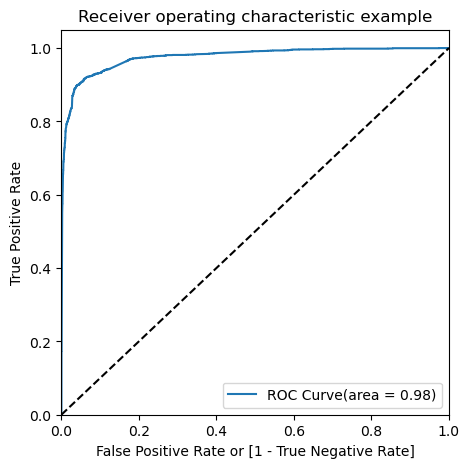

In [1705]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = [5,5])
    plt.plot(fpr, tpr, label = 'ROC Curve(area = %0.2f)' %auc_score)
    plt.plot([0,1], [0,1] ,'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

# Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- Since we have higher (0.98) area under the ROC curve , therefore our model is a good one.

Next step: Finding optimal cutoff
- Optimal probability is that cutoff prob where we get balanced sensitivity and specifity

In [1706]:
#Create columns with differnet probability cutoffs.
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head() 

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.110991,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.027200,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.007425,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.862317,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.998824,7987,1,1,1,1,1,1,1,1,1,1,1


In [1707]:
#Calculate accuracy, sensitivity, specifity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['Prob', 'Accuracy','Sensitivity', 'Specificity' ])
#TN = confusion[0,0] #True negative
#FP = confusion[0,1] #False positive
#FN = confusion[1,0] #False negative
#TP = confusion[1,1] #True positive'

In [1708]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i , Accuracy,Sensitivity,Specificity]
print(cutoff_df)

     Prob  Accuracy  Sensitivity  Specificity
0.0   0.0  0.385136     1.000000     0.000000
0.1   0.1  0.858762     0.974244     0.786428
0.2   0.2  0.907259     0.940311     0.886556
0.3   0.3  0.925681     0.922731     0.927529
0.4   0.4  0.932609     0.906378     0.949040
0.5   0.5  0.935758     0.892886     0.962612
0.6   0.6  0.932609     0.873262     0.969782
0.7   0.7  0.917966     0.821750     0.978233
0.8   0.8  0.912297     0.793540     0.986684
0.9   0.9  0.898441     0.751840     0.990269


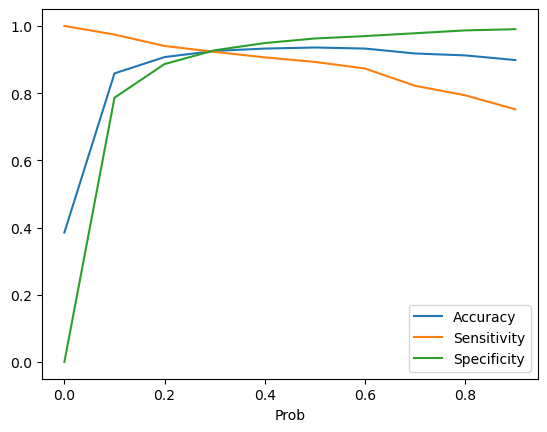

In [1709]:
#Let's plot the Acc, spe, sen for various probs
cutoff_df.plot.line(x = 'Prob', y = ['Accuracy','Sensitivity', 'Specificity'])
plt.show()

- From the curve above, all probabilities beyond 0.1 cutoff has a good predictive power. The optimum point is at 0.29, thus we can take 0.29 as the cutoff probability.

In [1710]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_prob.map(lambda x : 1 if x > 0.29 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.110991,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.027200,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.007425,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.862317,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.998824,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [1711]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'])

0.9244213509683514

- The accuracy remains at above 92% even after chaning the probability cutoff from 0.5 to 0.29

In [1712]:
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'] )
print(confusion2)

[[3612  293]
 [ 187 2259]]


#### Precision and Recall
- Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
- Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [1713]:
#Precision
Confusion[1,1]/(Confusion[0,1] +Confusion[1,1])*100

93.73390557939915

In [1714]:
#Recall
Confusion[1,1]/ (Confusion[1,1] + Confusion[1,0])*100

89.2886345053148

###### Using sklearn utilities for the same

In [1715]:
from sklearn.metrics import precision_score, recall_score

In [1716]:
#Precision
print(precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted))

0.8851880877742947


In [1717]:
#Recall score 
print(recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted))

0.9235486508585445


##### Precision and Recall Tradeoff

In [1718]:
from sklearn.metrics import precision_recall_curve

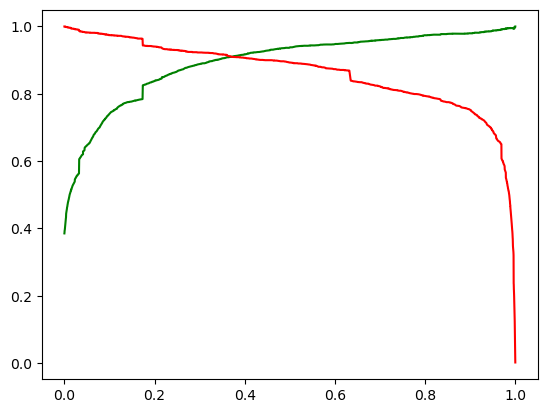

In [1719]:
p, r , thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], 'g-')
plt.plot(thresholds, r[:-1], 'r-')
plt.show()

- We can observe that 0.38 is is the tradeoff between recall and precison.Thus we can safely choose to consider any Prospect Lead with conversion probabilty higher than 38% to be a hot Lead.

#### Making prediction on the test set

In [1720]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [1721]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3271,0,-0.600595,0,0,0,0,0,0,1,0,0,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,1,0,0,0,0,0
4216,0,-0.888650,0,0,0,0,1,0,0,0,0,0,1,0
3830,0,-0.587751,1,0,0,0,0,0,1,0,0,0,0,0


In [1722]:
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3271,1.0,0,-0.600595,0,0,0,0,0,0,1,0,0,0,0,0
1490,1.0,0,1.887326,1,0,0,0,0,0,0,0,1,0,0,0
7936,1.0,0,-0.752879,0,0,0,0,0,0,1,0,0,0,0,0
4216,1.0,0,-0.888650,0,0,0,0,1,0,0,0,0,0,1,0
3830,1.0,0,-0.587751,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0,0.632357,1,0,0,0,0,0,1,0,0,0,1,0
2879,1.0,0,0.192017,1,0,0,0,0,0,0,0,0,0,1,0
6501,1.0,0,1.560740,1,0,1,0,0,0,0,0,1,0,0,0
7155,1.0,0,0.056246,1,0,0,0,0,0,1,0,0,0,1,0


In [1723]:
# Making predictions on the test set
y_test_pred = lg.predict(X_test_sm)
y_test_pred[:10]

3271    0.218890
1490    0.993214
7936    0.193844
4216    0.978894
3830    0.075134
1800    0.911806
6507    0.016706
4821    0.006250
4223    0.996125
4714    0.215380
dtype: float64

In [1724]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1725]:
# Let's see the head
y_pred_1.head()


,0
3271,0.218890
1490,0.993214
7936,0.193844
4216,0.978894
3830,0.075134


In [1726]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [1727]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,0,3271,0.218890
1,1,1490,0.993214
2,0,7936,0.193844
3,1,4216,0.978894
4,0,3830,0.075134


In [1728]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Lead Number,Converted_prob
0,0,3271,0.218890
1,1,1490,0.993214
2,0,7936,0.193844
3,1,4216,0.978894
4,0,3830,0.075134


In [1729]:
y_pred_final['Final Predicted'] = y_pred_final.Converted_prob.map(lambda x : 1 if x > 0.38 else 0)
y_pred_final.head()

,Converted,Lead Number,Converted_prob,Final Predicted
0,0,3271,0.218890,0
1,1,1490,0.993214,1
2,0,7936,0.193844,0
3,1,4216,0.978894,1
4,0,3830,0.075134,0


In [1730]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['Final Predicted']),2)

0.92

- We have overall 92% accuracy

In [1731]:
# Checking other metrics
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['Final Predicted'] )
confusion3

array([[1626,  108],
       [ 111,  878]], dtype=int64)

In [1732]:
TP = confusion3[1,1]
FP = confusion3[0,1]
TN = confusion3[0,0]
FN = confusion3[1,0]

In [1733]:
#Sensitivity 
TP/float(TP+FN)*100

88.77654196157735

In [1734]:
#Specificity
TN/ float( TN + FP)*100

93.77162629757785

In [1735]:
#False Positive rate
FP/(FP+TN)*100

6.228373702422145

In [1736]:
#Positive predictive value
TP/ float(TP+FP)*100

89.04665314401623

In [1737]:
#Negative predictive value 
TN/ float(TN+FN)*100

93.60967184801382

In [1738]:
#Precision
TP/ float(TP+FP)*100

89.04665314401623

In [1739]:
#Recall
TP/ float(TP+FN)*100

88.77654196157735

### Assigning a Lead Score based on the Model

In [1740]:
y_train_pred_final['Lead Score'] = y_train_pred_final['Converted_prob']*100

In [1741]:
y_train_pred_final = y_train_pred_final[['Lead Number', 'Converted', 'Converted_prob', 'Final_Predicted','Lead Score']]
y_train_pred_final.head()

,Lead Number,Converted,Converted_prob,Final_Predicted,Lead Score
0,3009,0,0.110991,0,11.099097
1,1012,0,0.027200,0,2.719978
2,9226,0,0.007425,0,0.742545
3,4750,1,0.862317,1,86.231667
4,7987,1,0.998824,1,99.882436


In [1742]:
y_train_pred_final.shape

(6351, 5)

### Assigning a Lead Score based on the Model -- Test SET

In [1743]:
# Assigning Lead Score to test dataset
y_pred_final['Lead Score'] = y_pred_final['Converted_prob'] * 100
y_pred_final.head()

,Converted,Lead Number,Converted_prob,Final Predicted,Lead Score
0,0,3271,0.218890,0,21.888951
1,1,1490,0.993214,1,99.321428
2,0,7936,0.193844,0,19.384368
3,1,4216,0.978894,1,97.889401
4,0,3830,0.075134,0,7.513384


In [1744]:
y_test_pred_final = y_pred_final[['Lead Number', 'Converted', 'Converted_prob', 'Final Predicted','Lead Score']]
y_test_pred_final.head()

,Lead Number,Converted,Converted_prob,Final Predicted,Lead Score
0,3271,0,0.218890,0,21.888951
1,1490,1,0.993214,1,99.321428
2,7936,0,0.193844,0,19.384368
3,4216,1,0.978894,1,97.889401
4,3830,0,0.075134,0,7.513384


In [1745]:
y_test_pred_final.shape

(2723, 5)

#### Observations:
After running the model on the Test Data , we obtain:

- Accuracy : 92 %
- Sensitivity : 88 %
- Specificity : 93 %

#### Results :
Comparing the values obtained for Train & Test:
    
Train Data:
    
- Accuracy : 93 %
- Sensitivity : 89 %
- Specificity : 96 %
    
Test Data:
    
- Accuracy : 92 %
- Sensitivity : 88 %
- Specificity : 93 %

Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

### Finding out the leads which should be contacted:
The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [1747]:
hot_leads=y_pred_final.loc[y_pred_final["Lead Score"]>=85]
hot_leads

,Converted,Lead Number,Converted_prob,Final Predicted,Lead Score
1,1,1490,0.993214,1,99.321428
3,1,4216,0.978894,1,97.889401
5,1,1800,0.911806,1,91.180552
8,1,4223,0.996125,1,99.612467
10,1,3977,0.997512,1,99.751183
...,...,...,...,...,...
2700,1,1050,0.985286,1,98.528622
2703,1,5741,0.902854,1,90.285386
2706,1,4642,0.992158,1,99.215831
2715,1,6299,0.976365,1,97.636496


In [1749]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Lead Number"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4216, 1800, 4223, 3977, 2570,  985, 1946, 2461, 5822, 2684,
       4809, 2010, 4062, 7696, 9049, 8465, 6676, 1518, 3765, 1106, 4543,
       4830, 1158, 4365, 7596, 2269, 7546, 6629, 1698, 3542, 5330, 7347,
       2504, 7220, 5913, 2896, 7674,  747, 4003, 4963, 6947, 4807,  446,
        789, 8372, 5805, 1586, 4478, 3758, 7984, 1561,  737,  768, 9034,
       3631, 5992, 6582, 6423, 5391, 8286, 4047,  686, 7174, 1436, 7552,
        725, 5173, 7014, 3932, 4080, 1475, 3838, 6708, 3332, 5785, 7230,
       6560, 1886, 2311, 7253, 4297, 4091,  200, 5860, 5490, 1995, 6532,
        999, 7517, 4498, 5797, 8687, 7653,  572,  211, 4149,   76, 4891,
       8255, 8233, 1460, 1300, 2820, 2018, 8389, 9169,  240, 3589, 2208,
       2256, 6743, 9093, 4426, 3703, 3307, 7897, 4208, 5952, 8719, 2138,
       9004,  944, 5976, 8701, 3976, 5769, 1051, 8399, 8862, 5742, 3820,
       9134, 8599, 1663, 4145, 3288, 8989, 4087, 8235, 2199, 8959, 7521,
       8966, 1522, 8282, 6070, 9067,  553, 6297, 67

#### Finding out the Important Features from our final model:

In [1751]:
lg.params.sort_values(ascending = False)

Tags_Closed by Horizzon                          9.418168
Tags_Lost to EINS                                8.553465
Tags_Will revert after reading the email         7.194673
Lead Source_Welingak Website                     4.664620
Tags_Busy                                        2.762399
Tags_Other Tags                                  2.186115
Last Activity_SMS Sent                           2.102388
Total Time Spent on Website                      1.005200
Do Not Email                                    -1.114543
Lead Origin_Landing Page Submission             -1.251138
Tags_switched off                               -1.327804
Tags_Ringing                                    -1.416476
Last Notable Activity_Olark Chat Conversation   -1.580894
Last Notable Activity_Modified                  -1.833483
const                                           -2.854547
dtype: float64

 The top three variables in the final model which contribute most towards the probability of lead getting converted are:-

- Tags_Closed by Horizzon
- Tags_Lost to EINS
- Tags_Will revert after reading the email